### Import required libraries

In [14]:
# %matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
# plt.rcParams['figure.figsize'] = [10, 5]

import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 5000)

## TRENDS

In [11]:
#### Read in the required counts datasets ####
fnl_mn_large = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_all_wdt_3z_core/counts/final_main_large_cities_core_counts.csv')
fnl_mn_med = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_all_wdt_3z_core/counts/final_main_medium_cities_core_counts.csv')
fnl_mn_sml = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_all_wdt_3z_core/counts/final_main_small_cities_core_counts.csv')

fnl_mn_wdt_low_3z_large = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_all_wdt_3z_core/counts/final_main_without_lower_3z_large_cities_core_counts.csv')
fnl_mn_wdt_low_3z_med = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_all_wdt_3z_core/counts/final_main_without_lower_3z_medium_cities_core_counts.csv')
fnl_mn_wdt_low_3z_sml = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_all_wdt_3z_core/counts/final_main_without_lower_3z_small_cities_core_counts.csv')

#### Read in the required rates datasets ####
fnl_mn_large_rates = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_all_wdt_3z_core/rates/final_main_large_cities_core_rates.csv')
fnl_mn_med_rates = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_all_wdt_3z_core/rates/final_main_medium_cities_core_rates.csv')
fnl_mn_sml_rates = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_all_wdt_3z_core/rates/final_main_small_cities_core_rates.csv')

fnl_mn_wdt_low_3z_large_rates = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_all_wdt_3z_core/rates/final_main_without_lower_3z_large_cities_core_rates.csv')
fnl_mn_wdt_low_3z_med_rates = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_all_wdt_3z_core/rates/final_main_without_lower_3z_medium_cities_core_rates.csv')
fnl_mn_wdt_low_3z_sml_rates = pd.read_csv('/Users/salma/Research/us_crime_data_analysis/data/final_all_wdt_3z_core/rates/final_main_without_lower_3z_small_cities_core_rates.csv')


Years =[1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]

In [5]:
print(fnl_mn_large.groupby('YEAR')['violent_crime'].mean())
'''
Cross checking mean calculations coz NY03030 in 1990 alone had 174542 violent crimes
'''

YEAR
1990    3310.340909
1991    3472.008646
1992    3370.785515
1993    3066.682493
1994    3176.037940
1995    3022.294444
1996    2874.274854
1997    2637.218487
1998    2446.725000
1999    2239.534435
2000    2277.985507
2001    2268.397727
2002    2058.762040
2003    2008.247126
2004    1938.270893
2005    1973.913793
2006    2037.355491
2007    2005.524927
2008    1951.008596
2009    1825.157143
2010    1703.843305
2011    1661.174312
2012    1671.684358
2013    1749.388732
2014    1765.355932
2015    1830.045714
Name: violent_crime, dtype: float64


'\nCross checking mean calculations coz NY03030 in 1990 alone had 174542 violent crimes\n'

In [6]:
fnl_mn_large.violent_crime.max()

174542.0

In [7]:
fnl_mn_large.violent_crime.idxmax()

6336

In [8]:
# Get value at a particular index and for a given column
max_vio_cr_ori = fnl_mn_large.iloc[6336]['ORI']
# max_vio_cr_ori = fnl_mn_large.at[6336, 'ORI']


fnl_mn_large_max_vio = fnl_mn_large.loc[fnl_mn_large.ORI == max_vio_cr_ori]

In [9]:
fnl_mn_large_max_vio['violent_crime']

6336    174542.0
6337    170390.0
6338    159578.0
6339    153543.0
6340    136522.0
6341    114023.0
6342     98660.0
6343     92853.0
6344     85891.0
6345     78945.0
6346     75692.0
6347     68204.0
6348     52384.0
6349     50564.0
6350     50088.0
Name: violent_crime, dtype: float64

In [10]:
fnl_mn_large_max_vio['violent_crime'].mean()

104125.26666666666

### 1. Violent Crime Counts for final main L,M,S and final main without outliers L,M,S over years

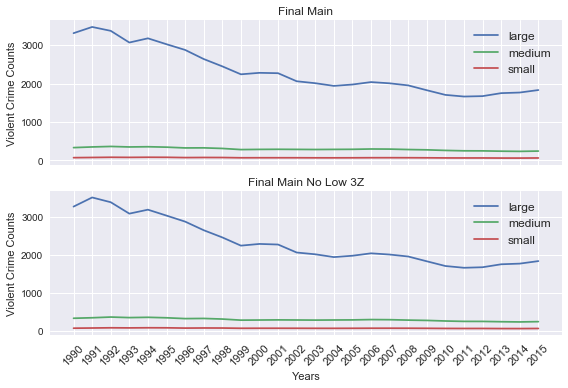

In [11]:
## Get a fig object to drawe 2 subplots
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)

# On the 1st plot, plot L,M,S for final main with all
ax[0].plot(Years, fnl_mn_large.groupby('YEAR')['violent_crime'].mean(), label='large')
ax[0].plot(Years, fnl_mn_med.groupby('YEAR')['violent_crime'].mean(), label='medium')
ax[0].plot(Years, fnl_mn_sml.groupby('YEAR')['violent_crime'].mean(), label='small')

ax[0].set_xticks(Years) 
ax[0].set_xticklabels(Years, fontsize=11, rotation=45)
ax[0].set_ylabel('Violent Crime Counts')
ax[0].legend(fontsize=12)
ax[0].set_title('Final Main')


# On the 2nd plot, plot L,M,S for final main with low 3z
ax[1].plot(Years, fnl_mn_wdt_low_3z_large.groupby('YEAR')['violent_crime'].mean(), label='large')
ax[1].plot(Years, fnl_mn_wdt_low_3z_med.groupby('YEAR')['violent_crime'].mean(), label='medium')
ax[1].plot(Years, fnl_mn_wdt_low_3z_sml.groupby('YEAR')['violent_crime'].mean(), label='small')

ax[1].set_xticks(Years) 
ax[1].set_xticklabels(Years, fontsize=11, rotation=45)
ax[1].set_xlabel('Years')
ax[1].set_ylabel('Violent Crime Counts')
ax[1].legend(fontsize=12)
ax[1].set_title('Final Main No Low 3Z')

plt.tight_layout()
plt.show()

### 2. PPT1 -  Violent Crime Rates for final main L,M,S and final main without outliers L,M,S over years

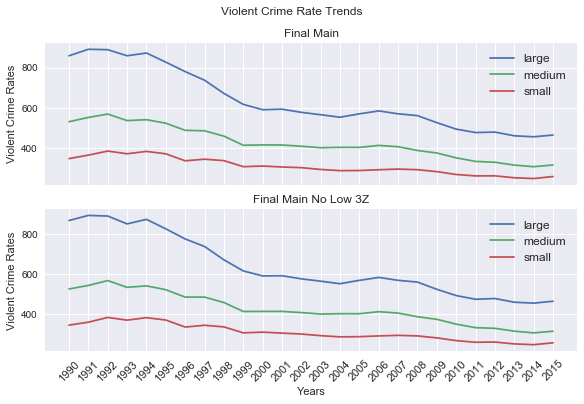

In [12]:
## Get a fig object to drawe 2 subplots
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, constrained_layout=True)

# On the 1st plot, plot L,M,S for final main with all
ax[0].plot(Years, fnl_mn_large_rates.groupby('YEAR')['violent_crime_rate'].mean(), label='large')
ax[0].plot(Years, fnl_mn_med_rates.groupby('YEAR')['violent_crime_rate'].mean(), label='medium')
ax[0].plot(Years, fnl_mn_sml_rates.groupby('YEAR')['violent_crime_rate'].mean(), label='small')

ax[0].set_xticks(Years) 
ax[0].set_xticklabels(Years, fontsize=11, rotation=45)
ax[0].set_ylabel('Violent Crime Rates')
ax[0].legend(fontsize=12)
ax[0].set_title('Final Main')


# On the 2nd plot, plot L,M,S for final main with low 3z
ax[1].plot(Years, fnl_mn_wdt_low_3z_large_rates.groupby('YEAR')['violent_crime_rate'].mean(), label='large')
ax[1].plot(Years, fnl_mn_wdt_low_3z_med_rates.groupby('YEAR')['violent_crime_rate'].mean(), label='medium')
ax[1].plot(Years, fnl_mn_wdt_low_3z_sml_rates.groupby('YEAR')['violent_crime_rate'].mean(), label='small')

ax[1].set_xticks(Years) 
ax[1].set_xticklabels(Years, fontsize=11, rotation=45)
ax[1].set_xlabel('Years')
ax[1].set_ylabel('Violent Crime Rates')
ax[1].legend(fontsize=12)
ax[1].set_title('Final Main No Low 3Z')

fig.suptitle('Violent Crime Rate Trends')

#plt.tight_layout()
plt.show()

### Weighted Average Calculator

In [13]:
# Create weighted averages
def create_weighted_avgs(df, avg_name, weight_name):
    d = df[avg_name]
    w = df[weight_name]
    try:
        return (d * w).sum() / w.sum()
    except ZeroDivisionError:
        return d.mean()

### Utility function to graph trends over years - 1 trend on each subplot

In [14]:
def graph_trend_subplot(rows, cols, req_dfs, x_var, y_var, titles, x_label, y_label, weights=None, pop_var=None):
    fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(12,5), sharex='col')
    fig.subplots_adjust(hspace=0.8, wspace=0.8)
    count = 0
    # axes are in a two-dimensional array, indexed by [row, col]
    for i in range(rows):
        for j in range(cols):
            if weights:
                axs[i, j].plot(x_var, req_dfs[count].groupby("YEAR").apply(create_weighted_avgs, f'{y_var}', f'{pop_var}'))
            else:
                axs[i, j].plot(x_var, req_dfs[count].groupby('YEAR')[f'{y_var}'].mean())
            
            axs[i, j].set_title(f'{titles[count]}')

            count += 1

    for ax in axs.flat:
        ax.set(xlabel=f'{x_label}', ylabel=f'{y_label}')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
#     for ax in axs.flat:
#         ax.label_outer()

    fig.tight_layout()

###  3. Violent Crime Counts for final main L,M,S and final main without outliers L,M,S over years¶
### (separate agency level comparison graphs) 

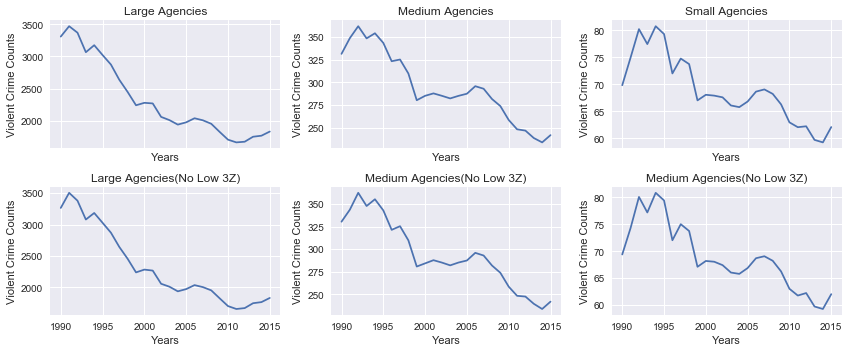

In [15]:
graph_trend_subplot(rows=2, 
             cols=3, 
             req_dfs = [fnl_mn_large, fnl_mn_med, fnl_mn_sml, fnl_mn_wdt_low_3z_large, fnl_mn_wdt_low_3z_med, fnl_mn_wdt_low_3z_sml],
             x_var = Years,
             y_var='violent_crime',
             titles = ['Large Agencies', 'Medium Agencies', 'Small Agencies', 'Large Agencies(No Low 3Z)', 
              'Medium Agencies(No Low 3Z)', 'Medium Agencies(No Low 3Z)'],
             x_label = 'Years',
            y_label='Violent Crime Counts')

### 4. Violent Crime Rates for final main L,M,S and final main without outliers L,M,S over years¶
### (separate agency level comparison graphs)

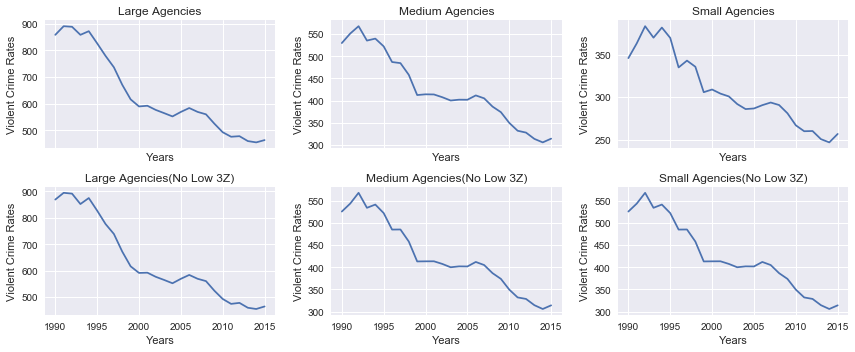

In [16]:
graph_trend_subplot(rows=2, 
             cols=3, 
             req_dfs = [fnl_mn_large_rates, fnl_mn_med_rates, fnl_mn_sml_rates, fnl_mn_wdt_low_3z_large_rates, 
                        fnl_mn_wdt_low_3z_med_rates, fnl_mn_wdt_low_3z_med_rates],
             x_var = Years,
             y_var='violent_crime_rate',
             titles = ['Large Agencies', 'Medium Agencies', 'Small Agencies', 'Large Agencies(No Low 3Z)', 
              'Medium Agencies(No Low 3Z)', 'Small Agencies(No Low 3Z)'],
             x_label = 'Years',
            y_label='Violent Crime Rates')

#### Since rate values for med and small agencies are higher than the corresponding counts, cross checking below.

In [17]:
fnl_mn_sml_rates.iloc[fnl_mn_sml_rates['violent_crime_rate'].idxmax()]['ORI'] # MI11248

'MI11248'

In [18]:
max_sml_vio_cr_rate = fnl_mn_sml_rates.loc[fnl_mn_sml_rates.ORI == fnl_mn_sml_rates.iloc[fnl_mn_sml_rates['violent_crime_rate'].idxmax()]['ORI']]

In [19]:
max_sml_vio_cr_rate['violent_crime_rate'].mean()

3382.2926270790044

In [20]:
max_sml_vio_count = fnl_mn_sml.loc[fnl_mn_sml.ORI == 'MI11248']
max_sml_vio_count['violent_crime'].mean()

391.64

###  5. Weighted Violent Crime Counts for final main L,M,S and final main without outliers L,M,S over years¶
### (separate agency level comparison graphs) 

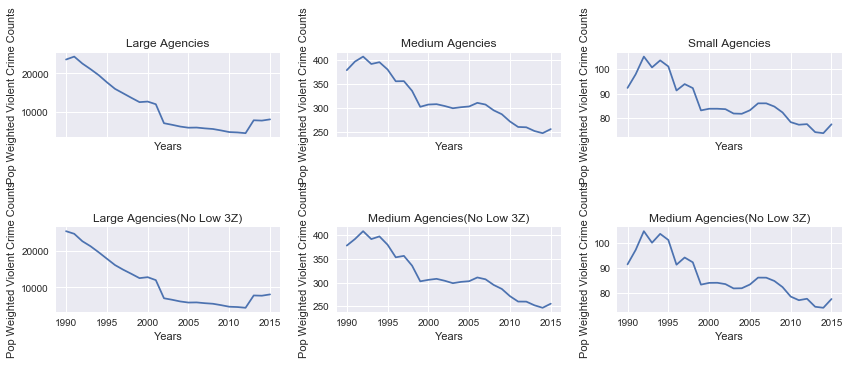

In [21]:
graph_trend_subplot(rows=2,
             cols=3,
             req_dfs = [fnl_mn_large, fnl_mn_med, fnl_mn_sml, fnl_mn_wdt_low_3z_large, fnl_mn_wdt_low_3z_med, fnl_mn_wdt_low_3z_sml],
             x_var = Years,
             y_var='violent_crime',
             titles = ['Large Agencies', 'Medium Agencies', 'Small Agencies', 'Large Agencies(No Low 3Z)', 
              'Medium Agencies(No Low 3Z)', 'Medium Agencies(No Low 3Z)'],
             x_label = 'Years',
             y_label='Pop Weighted Violent Crime Counts',
             weights=True,
             pop_var = 'population')

### JUST FOR CHECKING - weighted rates ####

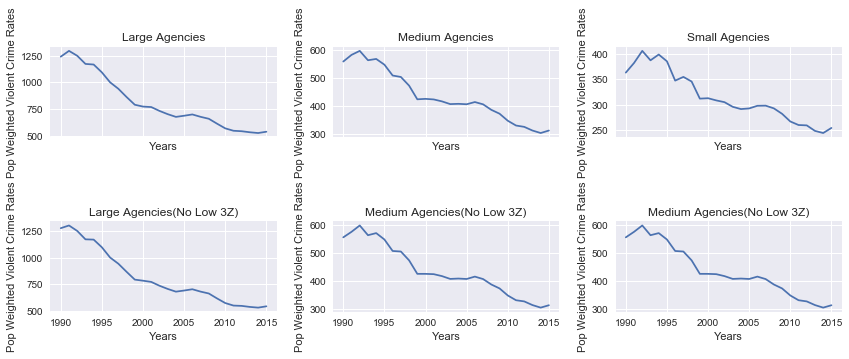

In [22]:
graph_trend_subplot(rows=2, 
             cols=3, 
             req_dfs = [fnl_mn_large_rates, fnl_mn_med_rates, fnl_mn_sml_rates, fnl_mn_wdt_low_3z_large_rates, 
                        fnl_mn_wdt_low_3z_med_rates, fnl_mn_wdt_low_3z_med_rates],
             x_var = Years,
             y_var='violent_crime_rate',
             titles = ['Large Agencies', 'Medium Agencies', 'Small Agencies', 'Large Agencies(No Low 3Z)', 
              'Medium Agencies(No Low 3Z)', 'Medium Agencies(No Low 3Z)'],
             x_label = 'Years',
            y_label='Pop Weighted Violent Crime Rates',
            weights=True,
             pop_var = 'population')

### Agency level crime trends' comparison for all and without low 3z on same plot

In [23]:
def mult_trends_subplots(x_label, y_label, x_var, y_var, req_dfs):
    ## Get a fig object to drawe 2 subplots
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    # On the 1st plot, plot L,M,S for final main with all
    axs[0].plot(x_var, req_dfs[0].groupby('YEAR')[f'{y_var}'].mean(), label='all')
    axs[0].plot(x_var, req_dfs[1].groupby('YEAR')[f'{y_var}'].mean(), label='without low 3z', linestyle='--')
    axs[0].set_title('Large Agencies', fontsize = 14)
    axs[0].legend(prop = {'size': 14})

    axs[1].plot(x_var, req_dfs[2].groupby('YEAR')[f'{y_var}'].mean(), label='all')
    axs[1].plot(x_var, req_dfs[3].groupby('YEAR')[f'{y_var}'].mean(), label='without low 3z', linestyle='--')
    axs[1].set_title('Medium Agencies', fontsize = 14)
    axs[1].legend(prop = {'size': 14})

    axs[2].plot(x_var, req_dfs[4].groupby('YEAR')[f'{y_var}'].mean(), label='all')
    axs[2].plot(x_var, req_dfs[5].groupby('YEAR')[f'{y_var}'].mean(), label='without low 3z', linestyle='--')
    axs[2].set_title('Small Agencies', fontsize = 14)

    for ax in axs.flat:
        ax.set(xlabel=f'{x_label}', ylabel=f'{y_label}')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
#     for ax in axs.flat:
#         ax.label_outer()

    plt.legend(prop = {'size': 14})
    plt.tight_layout()
    plt.show()

### PPT1 - Agency level violent crime counts comparison for all and without low 3z on same plot

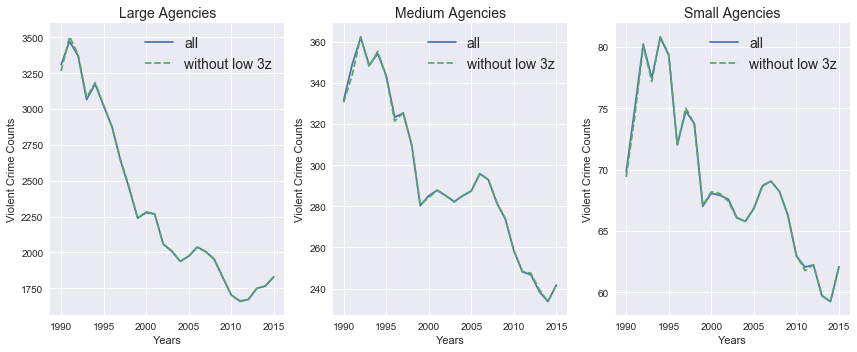

In [24]:
mult_trends_subplots(x_var = Years,
                     y_var = 'violent_crime',
                     req_dfs = [fnl_mn_large, fnl_mn_wdt_low_3z_large, fnl_mn_med, fnl_mn_wdt_low_3z_med, 
                                fnl_mn_sml, fnl_mn_wdt_low_3z_sml],
                     x_label = 'Years',
                     y_label = 'Violent Crime Counts')

### PPT1 - Agency level violent crime rates comparison for all and without low 3z on same plot

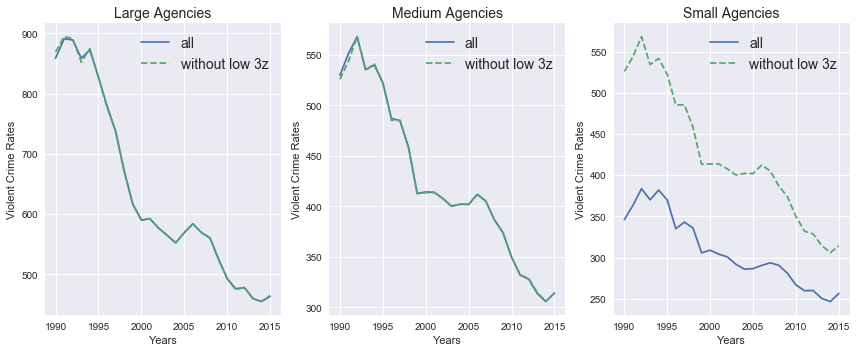

In [25]:
mult_trends_subplots(x_var = Years,
                     y_var = 'violent_crime_rate',
                     req_dfs = [fnl_mn_large_rates, fnl_mn_wdt_low_3z_large_rates, fnl_mn_med_rates, fnl_mn_wdt_low_3z_med_rates,
                                fnl_mn_sml_rates, fnl_mn_wdt_low_3z_med_rates],
                     x_label = 'Years',
                    y_label = 'Violent Crime Rates')

### Agency level weighted crime trends' comparison for all and without low 3z on same plot

In [26]:
def wghtd_mult_trends_subplots(x_label, y_label, x_var, y_var, req_dfs, pop_var):
    ## Get a fig object to drawe 2 subplots
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    # On the 1st plot, plot L,M,S for final main with all
    axs[0].plot(x_var, req_dfs[0].groupby("YEAR").apply(create_weighted_avgs, f'{y_var}', f'{pop_var}'), label='all')
    axs[0].plot(x_var, req_dfs[1].groupby('YEAR').apply(create_weighted_avgs, f'{y_var}', f'{pop_var}'), label='without low 3z', linestyle='--')
    axs[0].set_title('Large Agencies', fontsize = 14)
    axs[0].legend(prop = {'size': 14})

    axs[1].plot(x_var, req_dfs[2].groupby('YEAR').apply(create_weighted_avgs, f'{y_var}', f'{pop_var}'), label='all')
    axs[1].plot(x_var, req_dfs[3].groupby('YEAR').apply(create_weighted_avgs, f'{y_var}', f'{pop_var}'), label='without low 3z', linestyle='--')
    axs[1].set_title('Medium Agencies', fontsize = 14)
    axs[1].legend(prop = {'size': 14})

    axs[2].plot(x_var, req_dfs[4].groupby('YEAR').apply(create_weighted_avgs, f'{y_var}', f'{pop_var}'), label='all')
    axs[2].plot(x_var, req_dfs[5].groupby('YEAR').apply(create_weighted_avgs, f'{y_var}', f'{pop_var}'), label='without low 3z', linestyle='--')
    axs[2].set_title('Small Agencies', fontsize = 14)

    for ax in axs.flat:
        ax.set(xlabel=f'{x_label}', ylabel=f'{y_label}')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
#     for ax in axs.flat:
#         ax.label_outer()

    plt.legend(prop = {'size': 14})
    plt.tight_layout()
    plt.show()

### PPT1 - Agency level weighted violent crime counts comparison for all and without low 3z on same plot

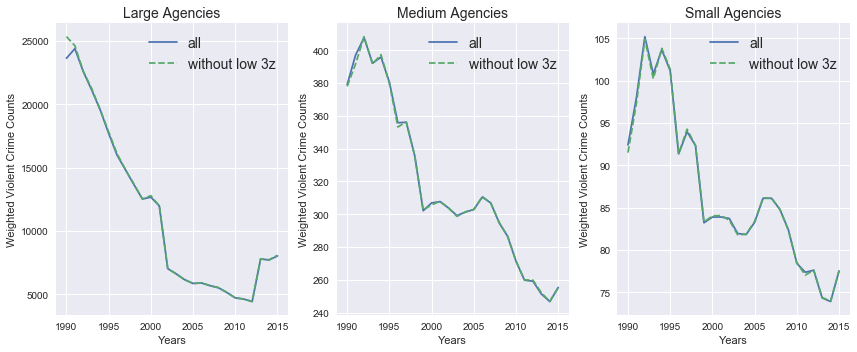

In [27]:
wghtd_mult_trends_subplots(x_var = Years,
                     y_var = 'violent_crime',
                     req_dfs = [fnl_mn_large, fnl_mn_wdt_low_3z_large, fnl_mn_med, fnl_mn_wdt_low_3z_med, 
                                fnl_mn_sml, fnl_mn_wdt_low_3z_sml],
                     x_label = 'Years',
                     y_label = 'Weighted Violent Crime Counts',
                    pop_var='population')

### Agency level weighted violent crime rates comparison for all and without low 3z on same plot

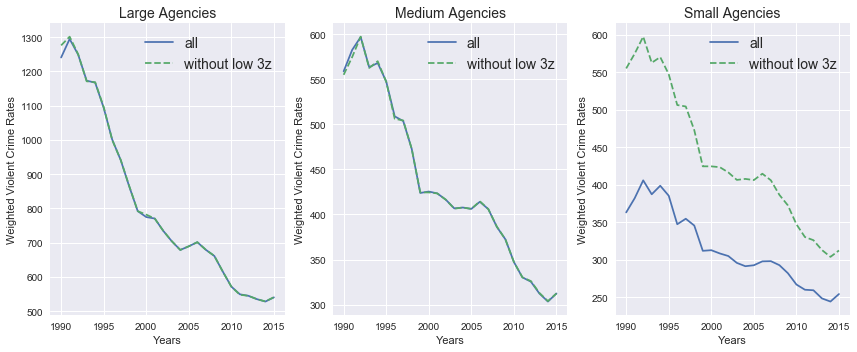

In [28]:
wghtd_mult_trends_subplots(x_var = Years,
                           y_var = 'violent_crime_rate',
                           req_dfs = [fnl_mn_large_rates, fnl_mn_wdt_low_3z_large_rates, fnl_mn_med_rates, fnl_mn_wdt_low_3z_med_rates,
                                fnl_mn_sml_rates, fnl_mn_wdt_low_3z_med_rates],
                           x_label = 'Years',
                           y_label = 'Weighted Violent Crime Rates',
                           pop_var='population')

### Agency level property crime counts comparison for all and without low 3z on same plot

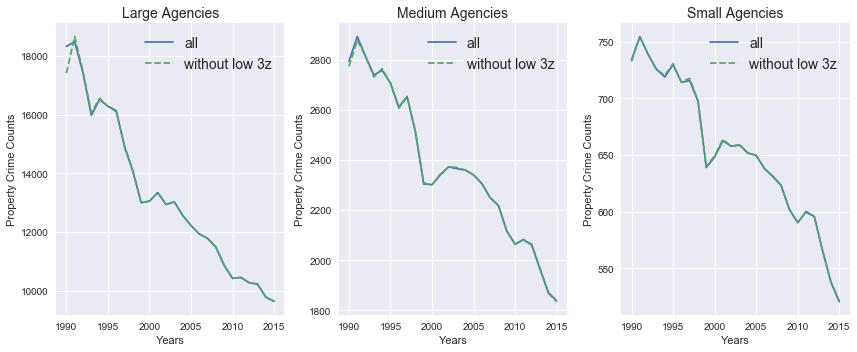

In [29]:
mult_trends_subplots(x_var = Years,
                     y_var = 'property_crime',
                     req_dfs = [fnl_mn_large, fnl_mn_wdt_low_3z_large, fnl_mn_med, fnl_mn_wdt_low_3z_med, 
                                fnl_mn_sml, fnl_mn_wdt_low_3z_sml],
                     x_label = 'Years',
                     y_label = 'Property Crime Counts')

### Agency level weighted property crime counts comparison for all and without low 3z on same plot


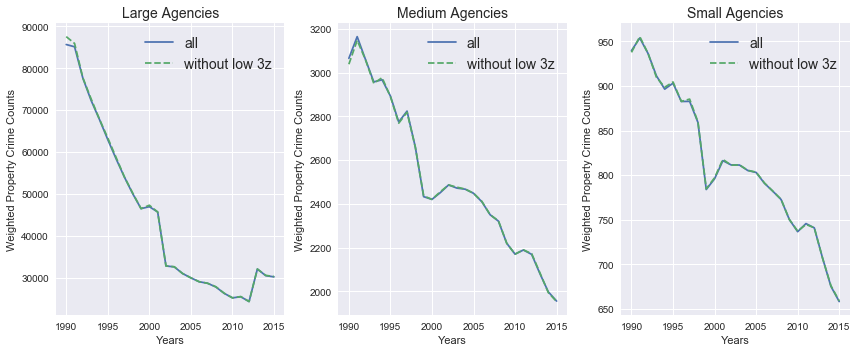

In [30]:
wghtd_mult_trends_subplots(x_var = Years,
                     y_var = 'property_crime',
                     req_dfs = [fnl_mn_large, fnl_mn_wdt_low_3z_large, fnl_mn_med, fnl_mn_wdt_low_3z_med, 
                                fnl_mn_sml, fnl_mn_wdt_low_3z_sml],
                     x_label = 'Years',
                     y_label = 'Weighted Property Crime Counts',
                    pop_var='population')

### Agency level property crime rates comparison for all and without low 3z on same plot

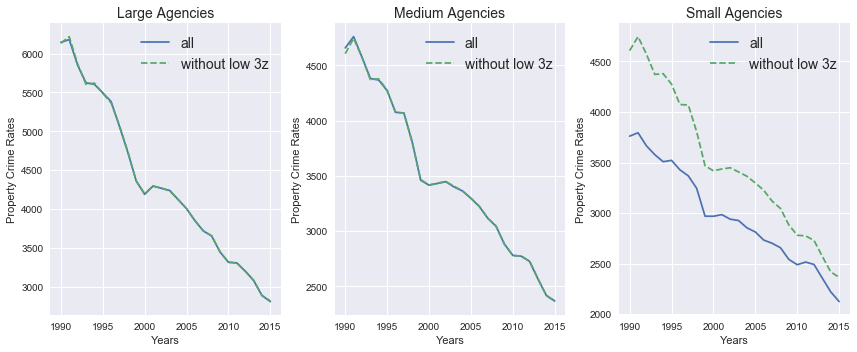

In [31]:
mult_trends_subplots(x_var = Years,
                     y_var = 'property_crime_rate',
                     req_dfs = [fnl_mn_large_rates, fnl_mn_wdt_low_3z_large_rates, fnl_mn_med_rates, fnl_mn_wdt_low_3z_med_rates,
                                fnl_mn_sml_rates, fnl_mn_wdt_low_3z_med_rates],
                     x_label = 'Years',
                    y_label = 'Property Crime Rates')

### Agency level weighted property crime rates comparison for all and without low 3z on same plot

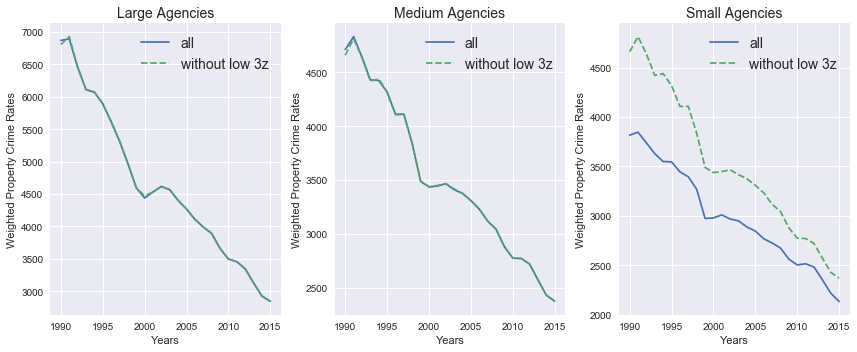

In [32]:
wghtd_mult_trends_subplots(x_var = Years,
                           y_var = 'property_crime_rate',
                           req_dfs = [fnl_mn_large_rates, fnl_mn_wdt_low_3z_large_rates, fnl_mn_med_rates, fnl_mn_wdt_low_3z_med_rates,
                                fnl_mn_sml_rates, fnl_mn_wdt_low_3z_med_rates],
                           x_label = 'Years',
                           y_label = 'Weighted Property Crime Rates',
                           pop_var='population')

## Violent crimes – as predicted by police officers, incarc, (big drivers), drug offenses, disorder, misdemeanor


### Agency level police officer counts comparison for all and without low 3z on same plot

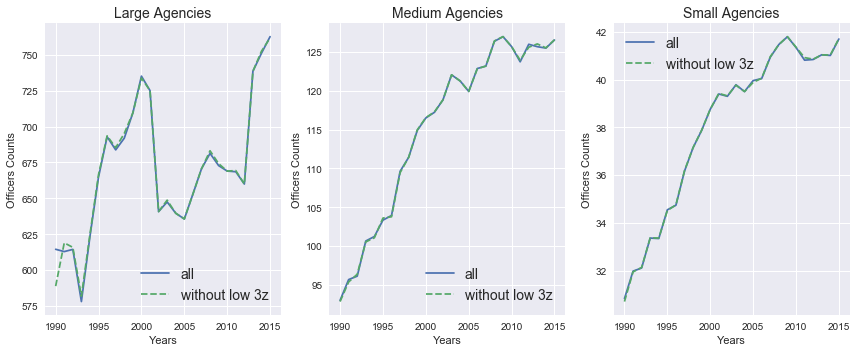

In [33]:
mult_trends_subplots(x_var = Years,
                     y_var = 'total_officers',
                     req_dfs = [fnl_mn_large, fnl_mn_wdt_low_3z_large, fnl_mn_med, fnl_mn_wdt_low_3z_med, 
                                fnl_mn_sml, fnl_mn_wdt_low_3z_sml],
                     x_label = 'Years',
                     y_label = 'Officers Counts')

# 2000 max, 2002 - dropped, 2013 - max again
# check the officer count means for these years


### Agency level weighted police officer counts comparison for all and without low 3z on same plot


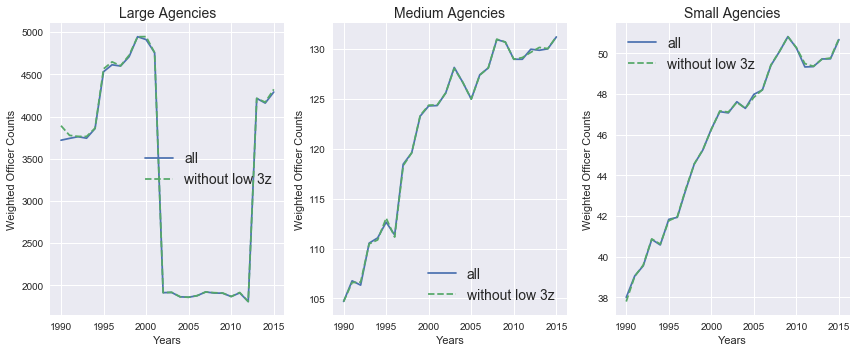

In [34]:
wghtd_mult_trends_subplots(x_var = Years,
                     y_var = 'total_officers',
                     req_dfs = [fnl_mn_large, fnl_mn_wdt_low_3z_large, fnl_mn_med, fnl_mn_wdt_low_3z_med, 
                                fnl_mn_sml, fnl_mn_wdt_low_3z_sml],
                     x_label = 'Years',
                     y_label = 'Weighted Officer Counts',
                    pop_var='population')

### Agency level police officer rates comparison for all and without low 3z on same plot

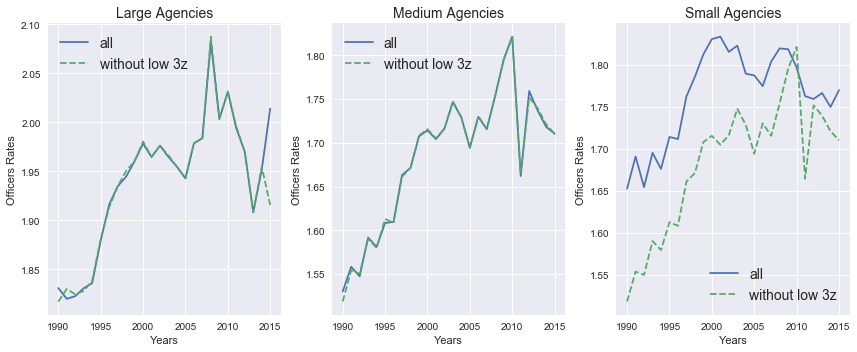

In [35]:
mult_trends_subplots(x_var = Years,
                     y_var = 'total_officers_rate',
                     req_dfs = [fnl_mn_large_rates, fnl_mn_wdt_low_3z_large_rates, fnl_mn_med_rates, fnl_mn_wdt_low_3z_med_rates,
                                fnl_mn_sml_rates, fnl_mn_wdt_low_3z_med_rates],
                     x_label = 'Years',
                    y_label = 'Officers Rates')


### Agency level weighted police officer rates comparison for all and without low 3z on same plot


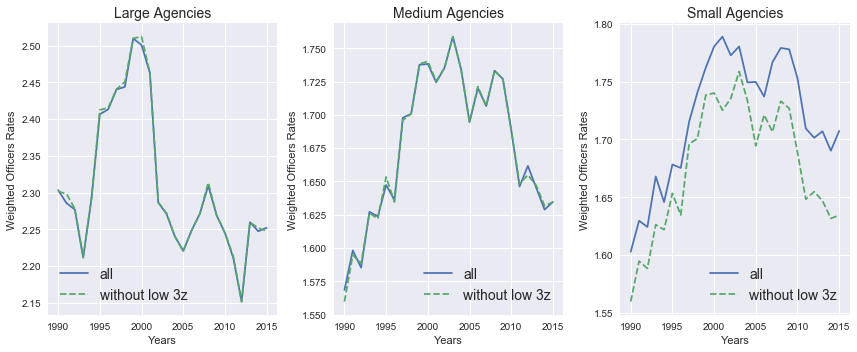

In [36]:
wghtd_mult_trends_subplots(x_var = Years,
                           y_var = 'total_officers_rate',
                           req_dfs = [fnl_mn_large_rates, fnl_mn_wdt_low_3z_large_rates, fnl_mn_med_rates, fnl_mn_wdt_low_3z_med_rates,
                                fnl_mn_sml_rates, fnl_mn_wdt_low_3z_med_rates],
                           x_label = 'Years',
                           y_label = 'Weighted Officers Rates',
                           pop_var='population')

### Agency level prison occupancy counts comparison for all and without low 3z on same plot

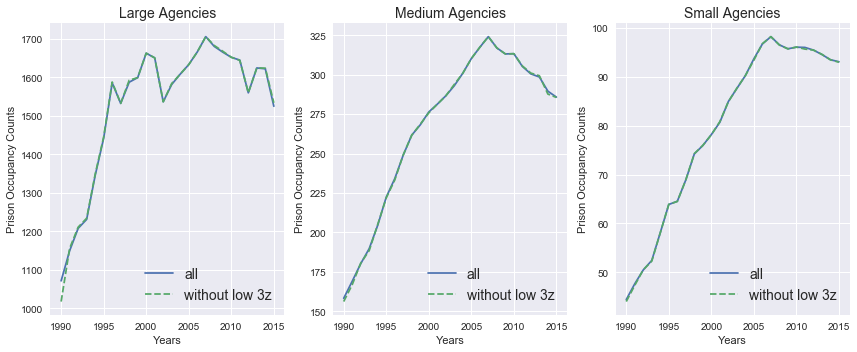

In [37]:
mult_trends_subplots(x_var = Years,
                     y_var = 'prison_occupancy_count',
                     req_dfs = [fnl_mn_large, fnl_mn_wdt_low_3z_large, fnl_mn_med, fnl_mn_wdt_low_3z_med, 
                                fnl_mn_sml, fnl_mn_wdt_low_3z_sml],
                     x_label = 'Years',
                     y_label = 'Prison Occupancy Counts')

### Agency level weighted prison occupancy counts comparison for all and without low 3z on same plot


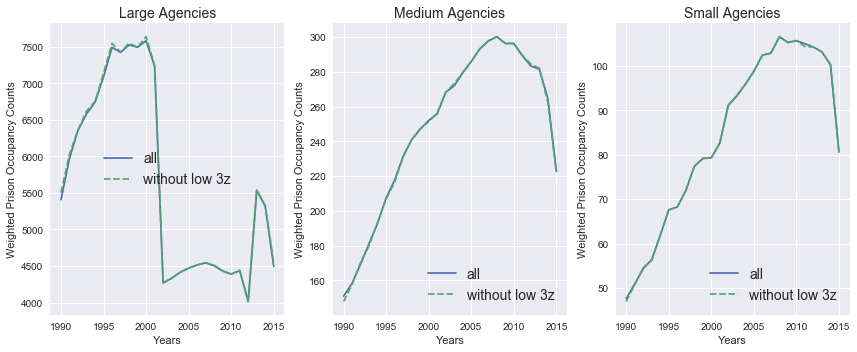

In [38]:
wghtd_mult_trends_subplots(x_var = Years,
                     y_var = 'prison_occupancy_count',
                     req_dfs = [fnl_mn_large, fnl_mn_wdt_low_3z_large, fnl_mn_med, fnl_mn_wdt_low_3z_med, 
                                fnl_mn_sml, fnl_mn_wdt_low_3z_sml],
                     x_label = 'Years',
                     y_label = 'Weighted Prison Occupancy Counts',
                    pop_var='population')

### Agency level prison occupancy count rates comparison for all and without low 3z on same plot

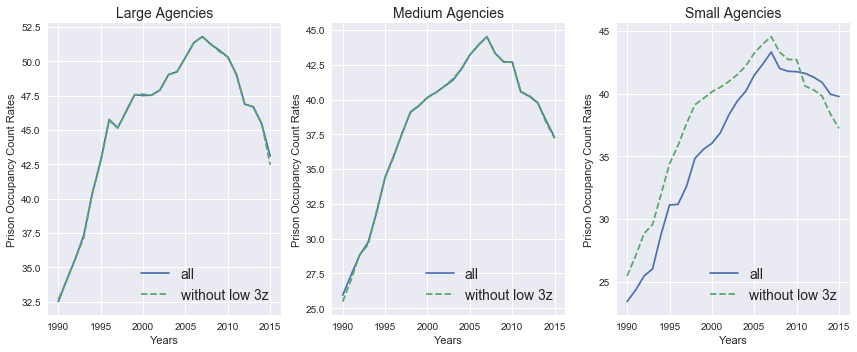

In [39]:
mult_trends_subplots(x_var = Years,
                     y_var = 'prison_occupancy_count_rate',
                     req_dfs = [fnl_mn_large_rates, fnl_mn_wdt_low_3z_large_rates, fnl_mn_med_rates, fnl_mn_wdt_low_3z_med_rates,
                                fnl_mn_sml_rates, fnl_mn_wdt_low_3z_med_rates],
                     x_label = 'Years',
                     y_label = 'Prison Occupancy Count Rates')

### Agency level weighted prison occupancy count rates comparison for all and without low 3z on same plot

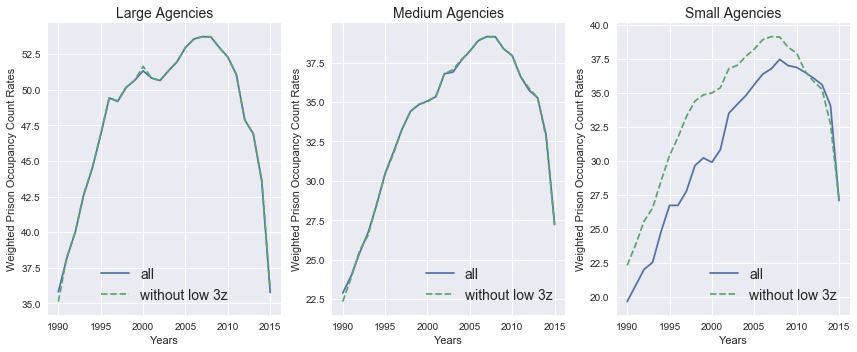

In [40]:
wghtd_mult_trends_subplots(x_var = Years,
                           y_var = 'prison_occupancy_count_rate',
                           req_dfs = [fnl_mn_large_rates, fnl_mn_wdt_low_3z_large_rates, fnl_mn_med_rates, fnl_mn_wdt_low_3z_med_rates,
                                fnl_mn_sml_rates, fnl_mn_wdt_low_3z_med_rates],
                           x_label = 'Years',
                           y_label = 'Weighted Prison Occupancy Count Rates',
                           pop_var='population')

### Agency level jail occupancy counts comparison for all and without low 3z on same plot

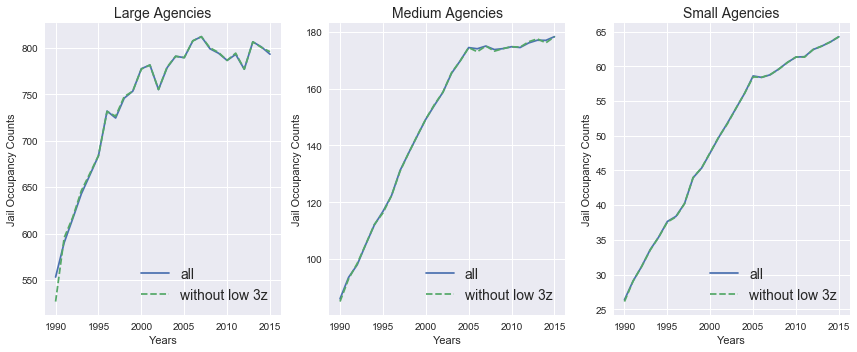

In [41]:
mult_trends_subplots(x_var = Years,
                     y_var = 'jail_occupancy_count',
                     req_dfs = [fnl_mn_large, fnl_mn_wdt_low_3z_large, fnl_mn_med, fnl_mn_wdt_low_3z_med, 
                                fnl_mn_sml, fnl_mn_wdt_low_3z_sml],
                     x_label = 'Years',
                     y_label = 'Jail Occupancy Counts')

### Agency level weighted jail occupancy counts comparison for all and without low 3z on same plot

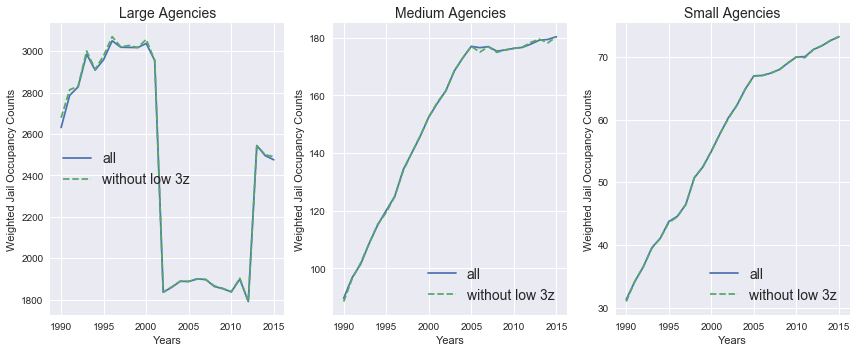

In [42]:
wghtd_mult_trends_subplots(x_var = Years,
                     y_var = 'jail_occupancy_count',
                     req_dfs = [fnl_mn_large, fnl_mn_wdt_low_3z_large, fnl_mn_med, fnl_mn_wdt_low_3z_med, 
                                fnl_mn_sml, fnl_mn_wdt_low_3z_sml],
                     x_label = 'Years',
                     y_label = 'Weighted Jail Occupancy Counts',
                    pop_var='population')

### Agency level jail occupancy count rates comparison for all and without low 3z on same plot

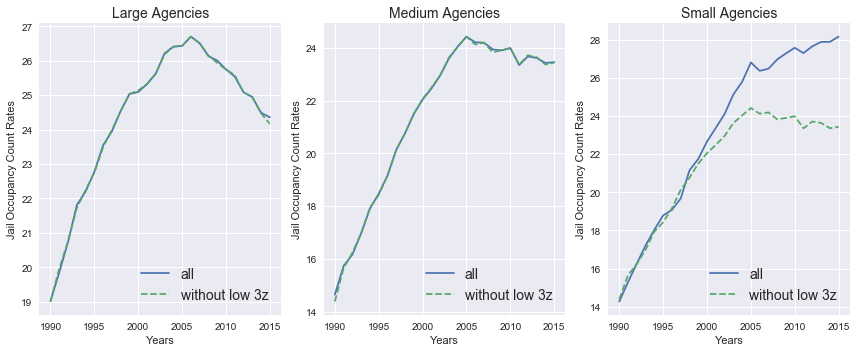

In [43]:
mult_trends_subplots(x_var = Years,
                     y_var = 'jail_occupancy_count_rate',
                     req_dfs = [fnl_mn_large_rates, fnl_mn_wdt_low_3z_large_rates, fnl_mn_med_rates, fnl_mn_wdt_low_3z_med_rates,
                                fnl_mn_sml_rates, fnl_mn_wdt_low_3z_med_rates],
                     x_label = 'Years',
                     y_label = 'Jail Occupancy Count Rates')

### Agency level weighted jail occupancy count rates comparison for all and without low 3z on same plot

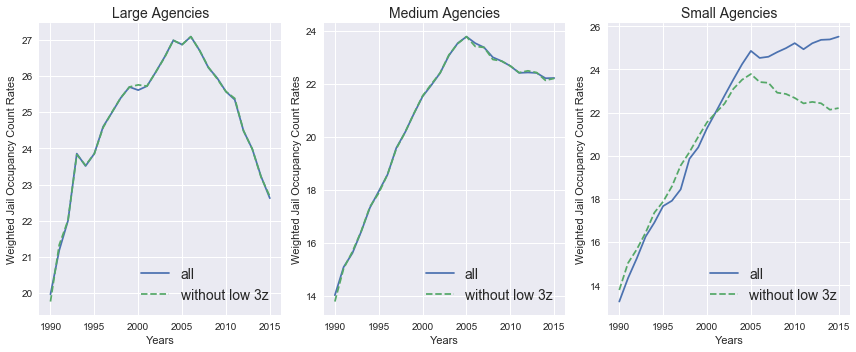

In [44]:
wghtd_mult_trends_subplots(x_var = Years,
                           y_var = 'jail_occupancy_count_rate',
                           req_dfs = [fnl_mn_large_rates, fnl_mn_wdt_low_3z_large_rates, fnl_mn_med_rates, fnl_mn_wdt_low_3z_med_rates,
                                fnl_mn_sml_rates, fnl_mn_wdt_low_3z_med_rates],
                           x_label = 'Years',
                           y_label = 'Weighted Jail Occupancy Count Rates',
                           pop_var='population')

### Agency level drug_tot_arrests comparison for all and without low 3z on same plot

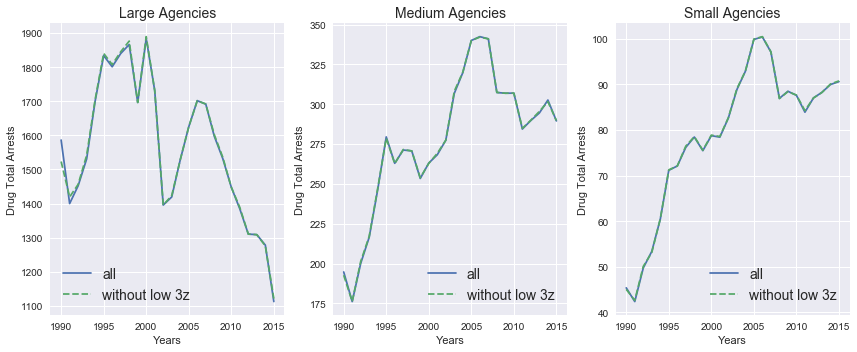

In [45]:
mult_trends_subplots(x_var = Years,
                     y_var = 'drug_tot_arrests',
                     req_dfs = [fnl_mn_large, fnl_mn_wdt_low_3z_large, fnl_mn_med, fnl_mn_wdt_low_3z_med, 
                                fnl_mn_sml, fnl_mn_wdt_low_3z_sml],
                     x_label = 'Years',
                     y_label = 'Drug Total Arrests')

### Agency level weighted drug_tot_arrests comparison for all and without low 3z on same plot

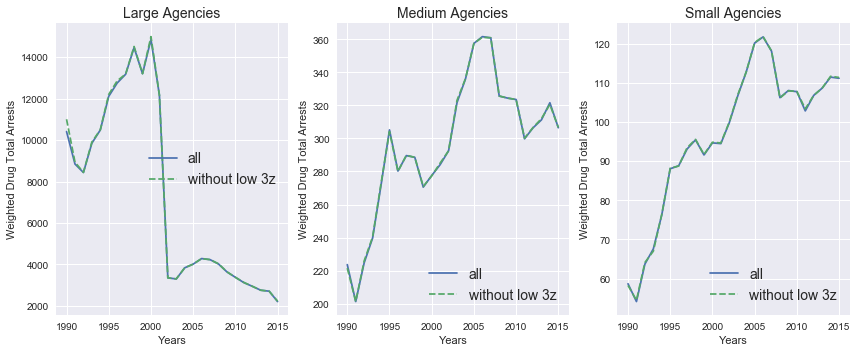

In [46]:
wghtd_mult_trends_subplots(x_var = Years,
                           y_var = 'drug_tot_arrests',
                           req_dfs = [fnl_mn_large, fnl_mn_wdt_low_3z_large, fnl_mn_med, fnl_mn_wdt_low_3z_med, 
                                fnl_mn_sml, fnl_mn_wdt_low_3z_sml],
                           x_label = 'Years',
                           y_label = 'Weighted Drug Total Arrests',
                           pop_var='population')

### Agency level drug_tot_arrests_rate comparison for all and without low 3z on same plot

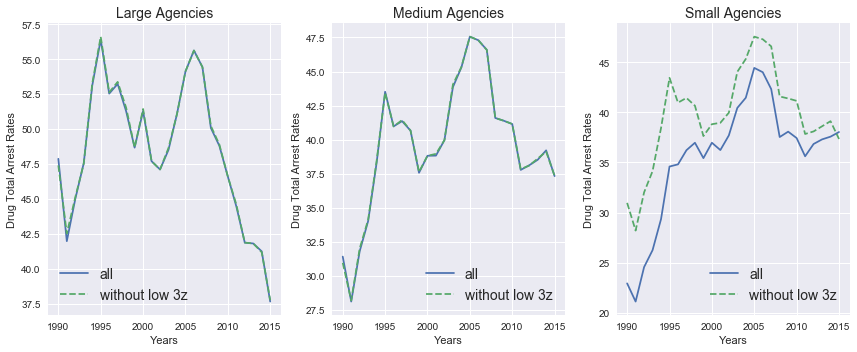

In [47]:
mult_trends_subplots(x_var = Years,
                     y_var = 'drug_tot_arrests_rate',
                     req_dfs = [fnl_mn_large_rates, fnl_mn_wdt_low_3z_large_rates, fnl_mn_med_rates, fnl_mn_wdt_low_3z_med_rates,
                                fnl_mn_sml_rates, fnl_mn_wdt_low_3z_med_rates],
                     x_label = 'Years',
                     y_label = 'Drug Total Arrest Rates')

### Agency level disorder_arrests_tot_index comparison for all and without low 3z on same plot

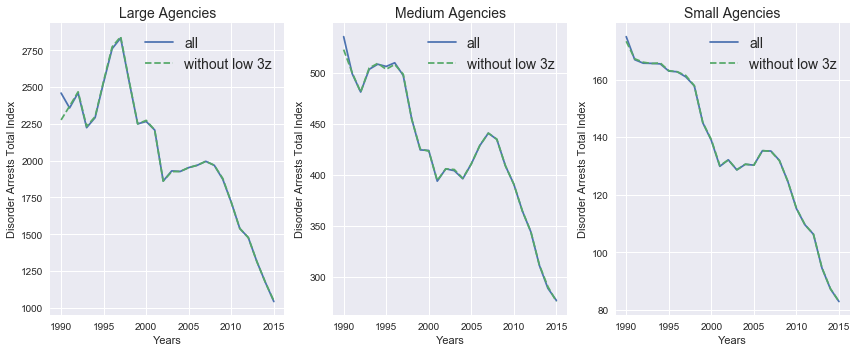

In [48]:
mult_trends_subplots(x_var = Years,
                     y_var = 'disorder_arrests_tot_index',
                     req_dfs = [fnl_mn_large, fnl_mn_wdt_low_3z_large, fnl_mn_med, fnl_mn_wdt_low_3z_med, 
                                fnl_mn_sml, fnl_mn_wdt_low_3z_sml],
                     x_label = 'Years',
                     y_label = 'Disorder Arrests Total Index')

### Agency level weighted disorder_arrests_tot_index comparison for all and without low 3z on same plot

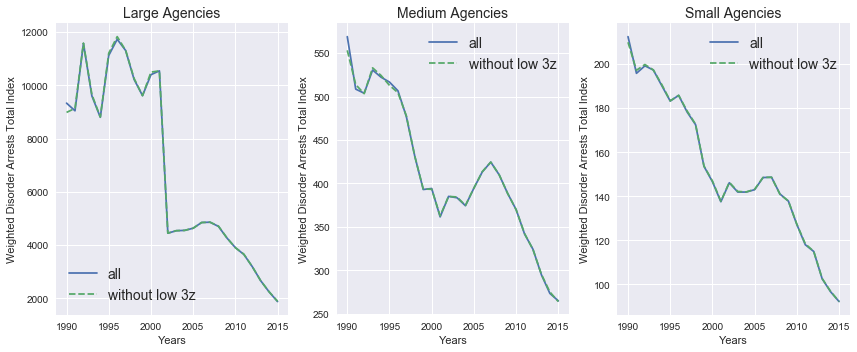

In [49]:
wghtd_mult_trends_subplots(x_var = Years,
                           y_var = 'disorder_arrests_tot_index',
                           req_dfs = [fnl_mn_large, fnl_mn_wdt_low_3z_large, fnl_mn_med, fnl_mn_wdt_low_3z_med, 
                                fnl_mn_sml, fnl_mn_wdt_low_3z_sml],
                           x_label = 'Years',
                           y_label = 'Weighted Disorder Arrests Total Index',
                           pop_var='population')

### Agency level disorder_arrests_tot_index_rate comparison for all and without low 3z on same plot

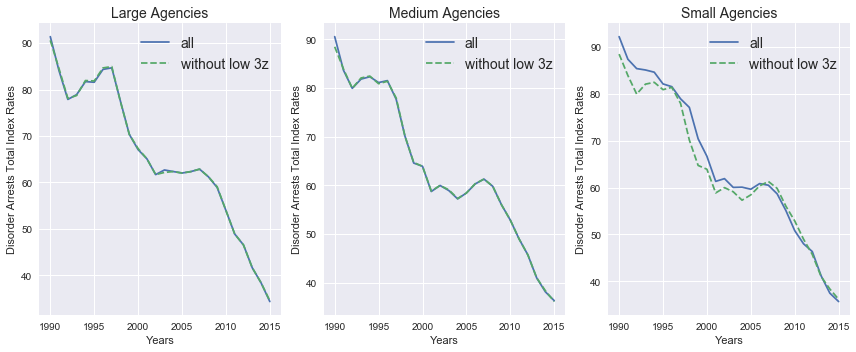

In [50]:
mult_trends_subplots(x_var = Years,
                     y_var = 'disorder_arrests_tot_index_rate',
                     req_dfs = [fnl_mn_large_rates, fnl_mn_wdt_low_3z_large_rates, fnl_mn_med_rates, fnl_mn_wdt_low_3z_med_rates,
                                fnl_mn_sml_rates, fnl_mn_wdt_low_3z_med_rates],
                     x_label = 'Years',
                     y_label = 'Disorder Arrests Total Index Rates')

### Agency level drug_tot_arrests_black comparison for all and without low 3z on same plot


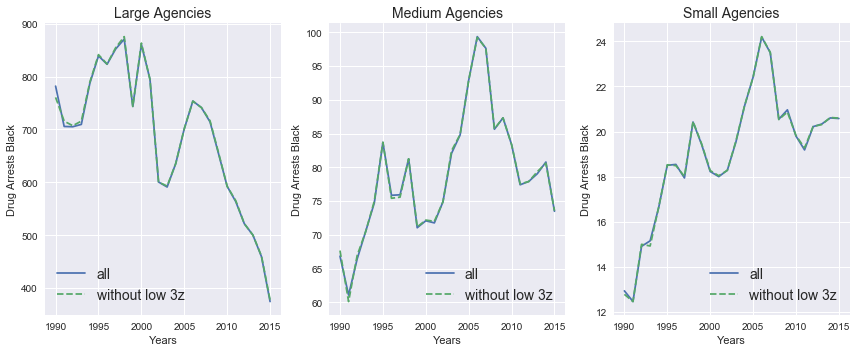

In [51]:
mult_trends_subplots(x_var = Years,
                     y_var = 'drug_tot_arrests_black',
                     req_dfs = [fnl_mn_large, fnl_mn_wdt_low_3z_large, fnl_mn_med, fnl_mn_wdt_low_3z_med, 
                                fnl_mn_sml, fnl_mn_wdt_low_3z_sml],
                     x_label = 'Years',
                     y_label = 'Drug Arrests Black')

### Agency level weighted drug_tot_arrests_black comparison for all and without low 3z on same plot



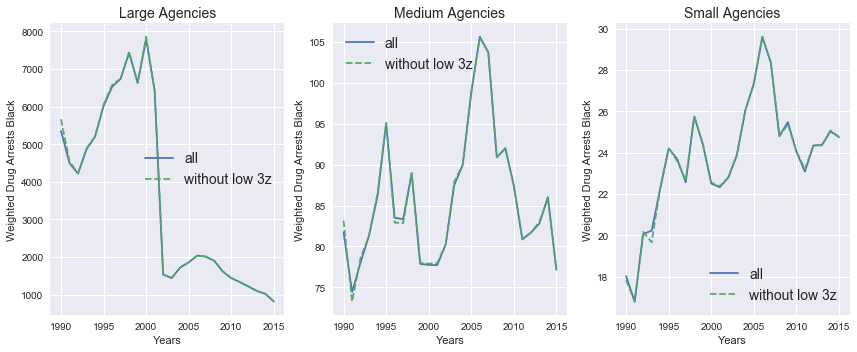

In [52]:
wghtd_mult_trends_subplots(x_var = Years,
                           y_var = 'drug_tot_arrests_black',
                           req_dfs = [fnl_mn_large, fnl_mn_wdt_low_3z_large, fnl_mn_med, fnl_mn_wdt_low_3z_med, 
                                fnl_mn_sml, fnl_mn_wdt_low_3z_sml],
                           x_label = 'Years',
                           y_label = 'Weighted Drug Arrests Black',
                           pop_var='population')

### Agency level drug_tot_arrests_black_rate comparison for all and without low 3z on same plot



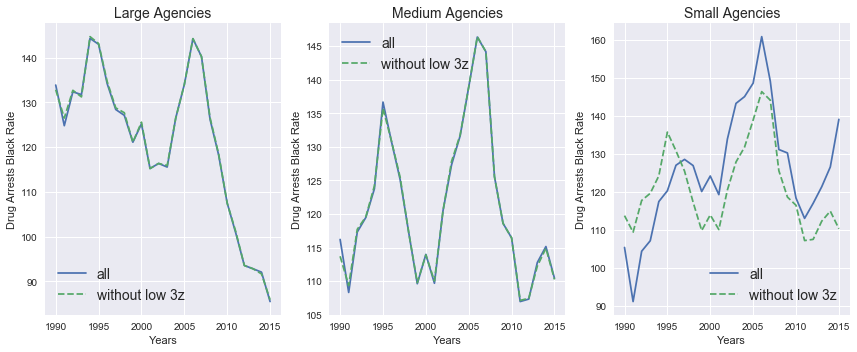

In [53]:
mult_trends_subplots(x_var = Years,
                     y_var = 'drug_tot_arrests_black_rate',
                     req_dfs = [fnl_mn_large_rates, fnl_mn_wdt_low_3z_large_rates, fnl_mn_med_rates, fnl_mn_wdt_low_3z_med_rates,
                                fnl_mn_sml_rates, fnl_mn_wdt_low_3z_med_rates],
                     x_label = 'Years',
                     y_label = 'Drug Arrests Black Rate')

### Agency level drug_tot_arrests_white comparison for all and without low 3z on same plot



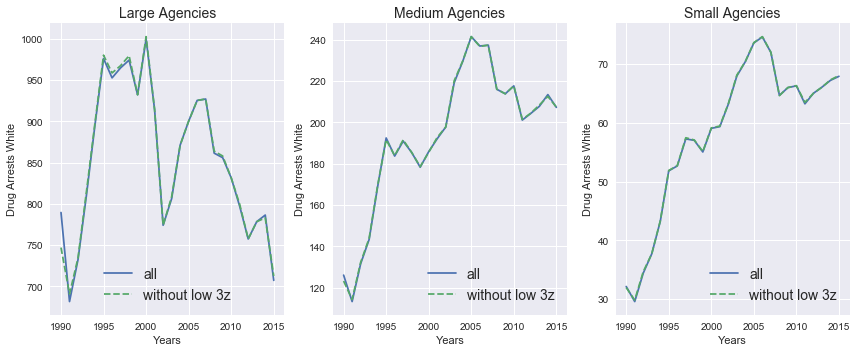

In [54]:
mult_trends_subplots(x_var = Years,
                     y_var = 'drug_tot_arrests_white',
                     req_dfs = [fnl_mn_large, fnl_mn_wdt_low_3z_large, fnl_mn_med, fnl_mn_wdt_low_3z_med, 
                                fnl_mn_sml, fnl_mn_wdt_low_3z_sml],
                     x_label = 'Years',
                     y_label = 'Drug Arrests White')

### Agency level weighted drug_tot_arrests_white comparison for all and without low 3z on same plot



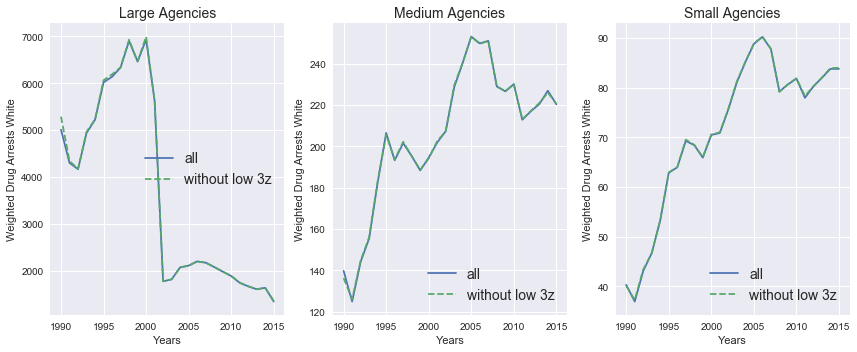

In [55]:
wghtd_mult_trends_subplots(x_var = Years,
                           y_var = 'drug_tot_arrests_white',
                           req_dfs = [fnl_mn_large, fnl_mn_wdt_low_3z_large, fnl_mn_med, fnl_mn_wdt_low_3z_med, 
                                fnl_mn_sml, fnl_mn_wdt_low_3z_sml],
                           x_label = 'Years',
                           y_label = 'Weighted Drug Arrests White',
                           pop_var='population')

### Agency level drug_tot_arrests_white_rate comparison for all and without low 3z on same plot



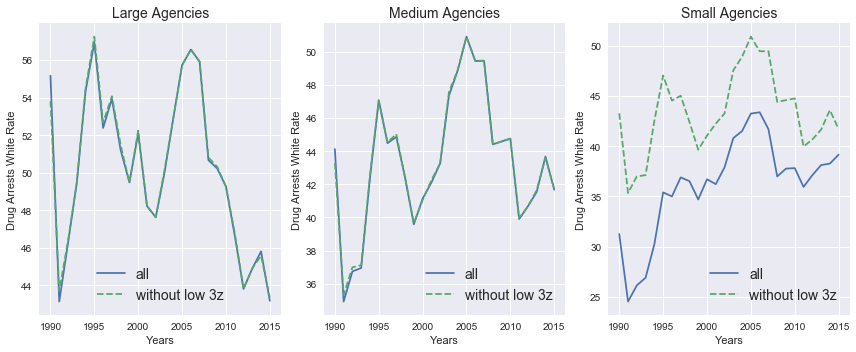

In [56]:
mult_trends_subplots(x_var = Years,
                     y_var = 'drug_tot_arrests_white_rate',
                     req_dfs = [fnl_mn_large_rates, fnl_mn_wdt_low_3z_large_rates, fnl_mn_med_rates, fnl_mn_wdt_low_3z_med_rates,
                                fnl_mn_sml_rates, fnl_mn_wdt_low_3z_med_rates],
                     x_label = 'Years',
                     y_label = 'Drug Arrests White Rate')

### Agency level perc_felonies comparison for all and without low 3z on same plot


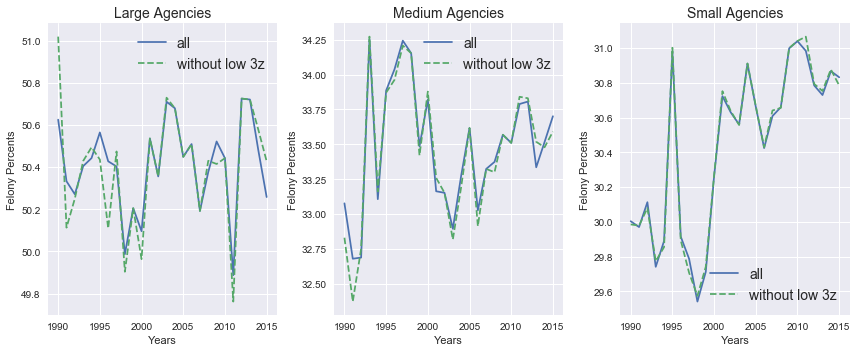

In [57]:
mult_trends_subplots(x_var = Years,
                     y_var = 'perc_felonies',
                     req_dfs = [fnl_mn_large, fnl_mn_wdt_low_3z_large, fnl_mn_med, fnl_mn_wdt_low_3z_med, 
                                fnl_mn_sml, fnl_mn_wdt_low_3z_sml],
                     x_label = 'Years',
                     y_label = 'Felony Percents')

### Agency level perc_misdemeanors comparison for all and without low 3z on same plot



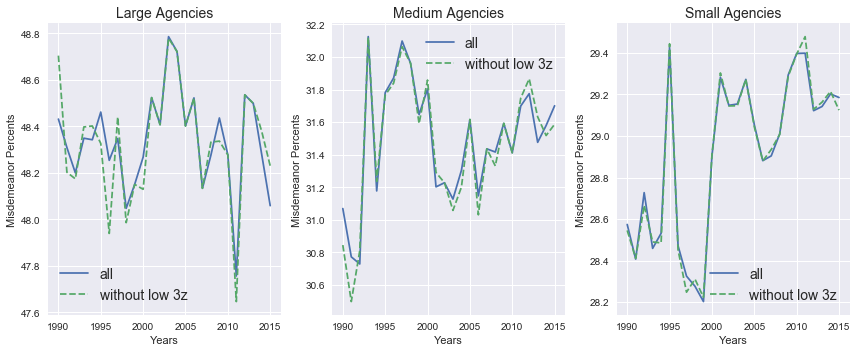

In [58]:
mult_trends_subplots(x_var = Years,
                     y_var = 'perc_misdemeanors',
                     req_dfs = [fnl_mn_large, fnl_mn_wdt_low_3z_large, fnl_mn_med, fnl_mn_wdt_low_3z_med, 
                                fnl_mn_sml, fnl_mn_wdt_low_3z_sml],
                     x_label = 'Years',
                     y_label = 'Misdemeanor Percents')

### MULTIPLE TRENDS ON A SINGLE PLOT

In [59]:
import seaborn as sns
sns.set()

In [60]:
def mult_trends_single_plot(req_dfs, groupby_var, x_var, y_var_list, x_label, 
                            y_label, plt_titles, weighted=None, weights_var=None):
    fig, axs = plt.subplots(nrows=len(req_dfs), ncols=1, figsize=(15, 25), sharex=True)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    count = 0 ## to keep track of dataframe being iterated from the req_dfs list
    for req_df in req_dfs:
        for y_var in y_var_list:
            if weighted:
                axs[count].plot(x_var, req_df.groupby(f'{groupby_var}').apply(create_weighted_avgs, f'{y_var}', f'{weights_var}'), label=y_var)
            else:
                axs[count].plot(x_var, req_df.groupby(f'{groupby_var}')[f'{y_var}'].mean(), label=y_var)
                
            #axs[count].set_xlabel(f'{x_label}')
            axs[count].set_ylabel(f'{y_label}')
            axs[count].legend(prop = {'size': 14})
            axs[count].set_title(plt_titles[count], fontsize = 14)
            axs[count].set_xticks(Years) 
            axs[count].set_xticklabels(Years, fontsize=11, rotation=45)
            # axs[count].set_yscale('log')
        count += 1
                    

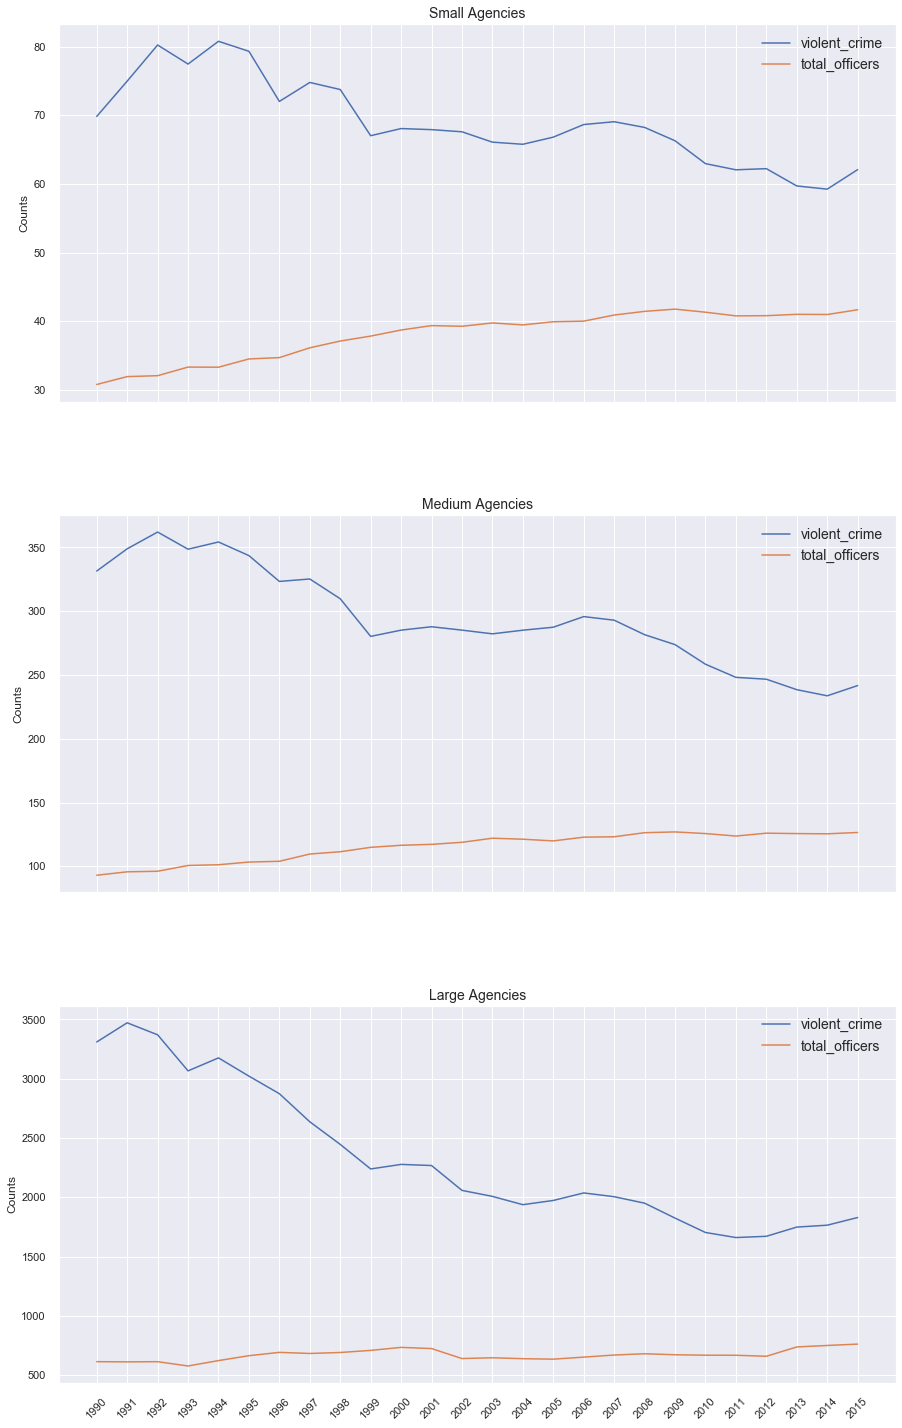

In [61]:
mult_trends_single_plot(req_dfs = [fnl_mn_sml, fnl_mn_med, fnl_mn_large],
                        groupby_var='YEAR',
                        x_var = Years,
                        y_var_list = ['violent_crime', 'total_officers'],
                        x_label = 'Years',
                        y_label = 'Counts',
                        plt_titles=['Small Agencies', 'Medium Agencies', 'Large Agencies']
                       )

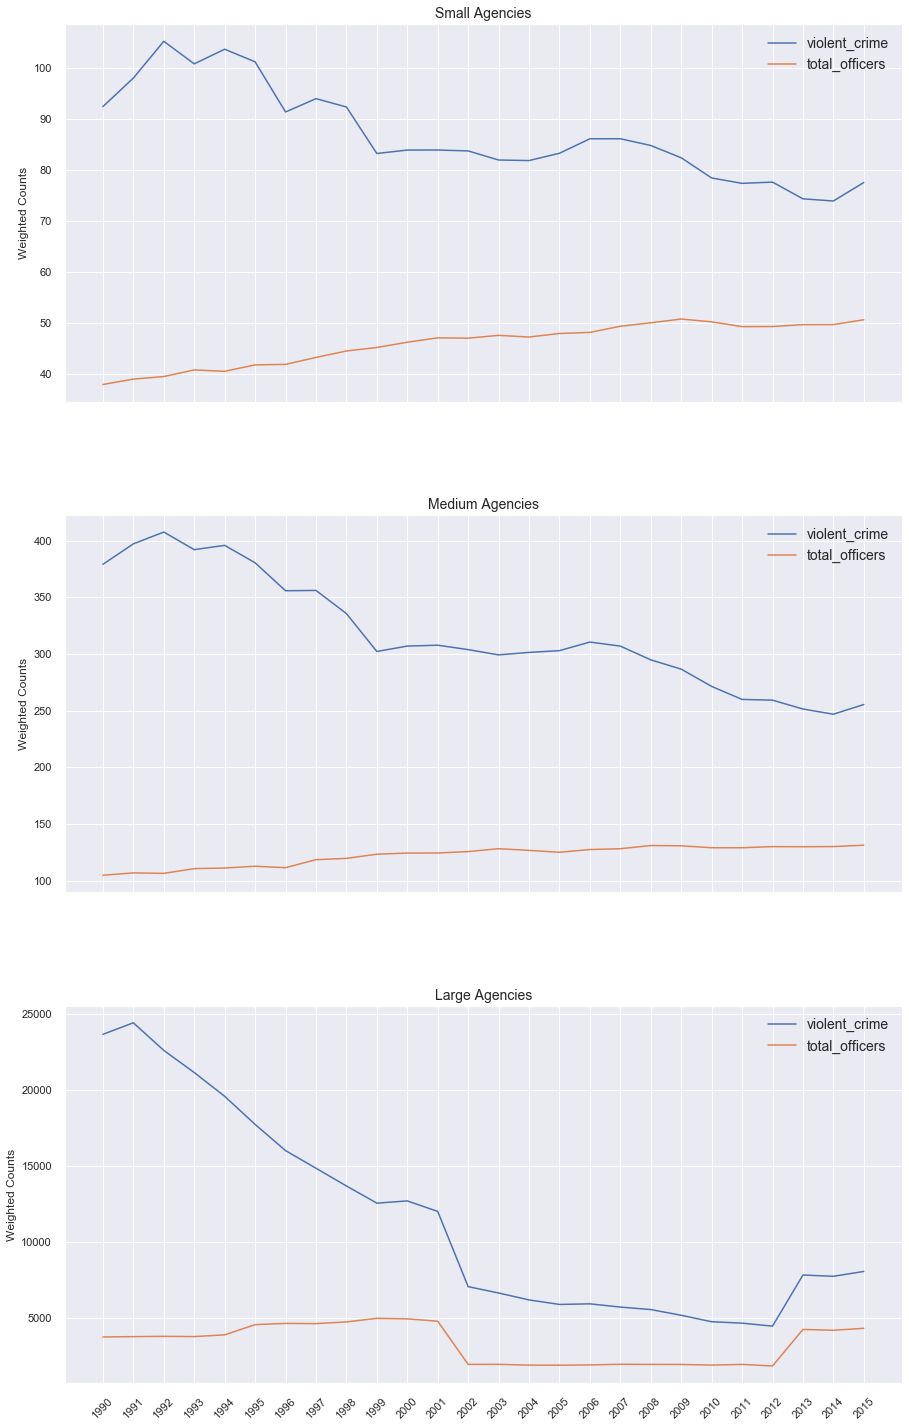

In [62]:
mult_trends_single_plot(req_dfs = [fnl_mn_sml, fnl_mn_med, fnl_mn_large],
                        groupby_var='YEAR',
                        x_var = Years,
                        y_var_list = ['violent_crime', 'total_officers'],
                        x_label = 'Years',
                        y_label = 'Weighted Counts',
                        plt_titles=['Small Agencies', 'Medium Agencies', 'Large Agencies'],
                        weighted=True,
                        weights_var='population'
                       )

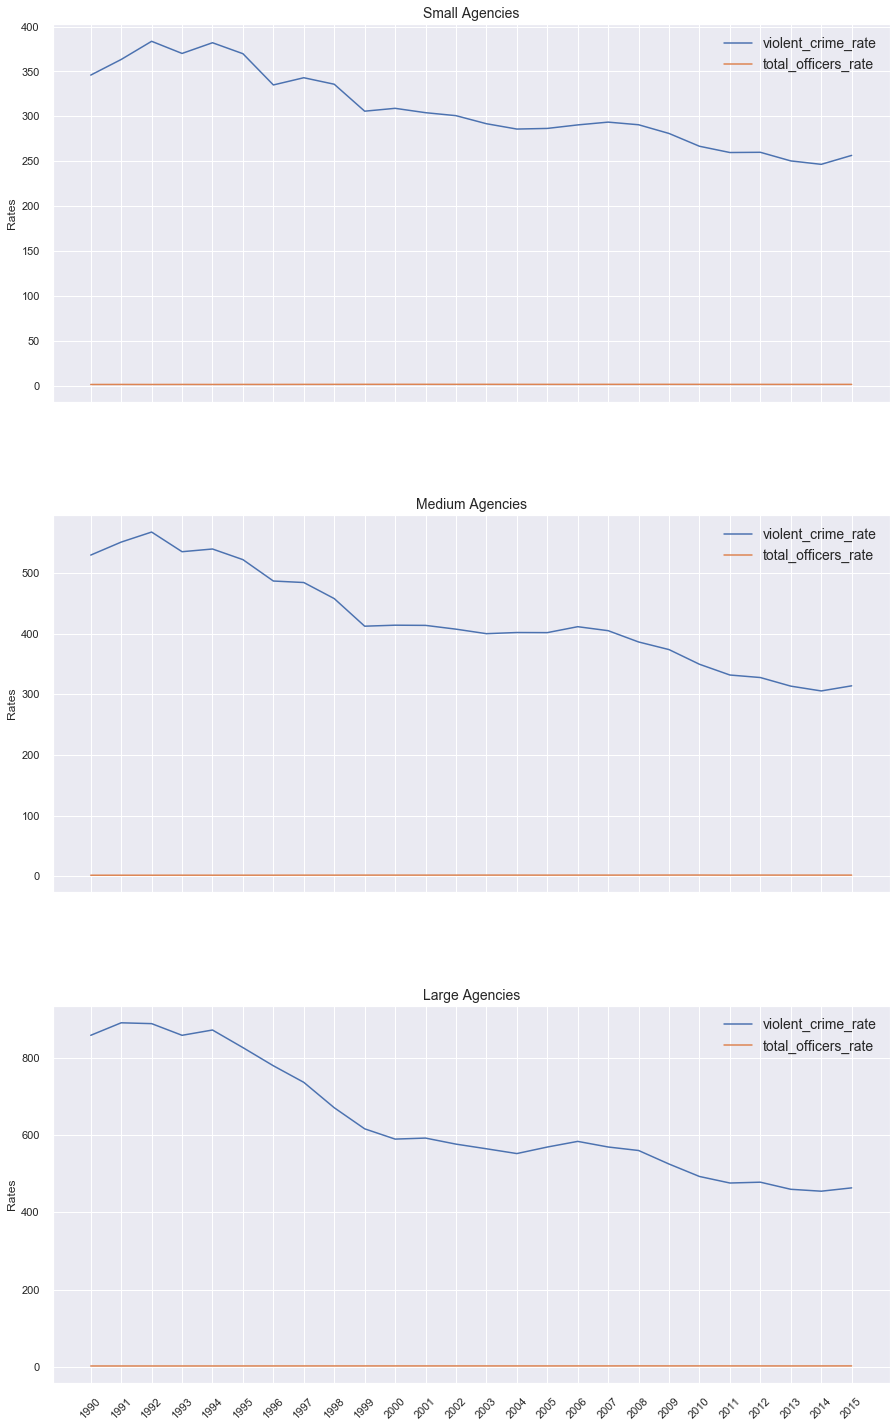

In [63]:
mult_trends_single_plot(req_dfs = [fnl_mn_sml_rates, fnl_mn_med_rates, fnl_mn_large_rates],
                        groupby_var='YEAR',
                        x_var = Years,
                        y_var_list = ['violent_crime_rate', 'total_officers_rate'],
                        x_label = 'Years',
                        y_label = 'Rates',
                        plt_titles=['Small Agencies', 'Medium Agencies', 'Large Agencies']
                       )

### EACH ROW FOR ONE VAR AND MULTIPLE PLOTS ON A SINGLE ROW - FOR 3 TYPES OF AGENCIES

In [3]:
def mult_plots_mult_rows(req_dfs, groupby_var, x_var, y_var_list, x_label, 
                            y_label_lst, plt_titles, fig_title, weighted=None, weights_var=None):
    fig, axs = plt.subplots(nrows=2, ncols=len(req_dfs), figsize=(12, 5), sharex=True, constrained_layout=True)
    #fig.subplots_adjust(hspace=0.8, wspace=0.4) -- doesn't work with constrained_layout
    
    for rw in range(2):
        count = 0 ## to keep track of dataframe being iterated from the req_dfs list and also for col position on a given row
        for req_df in req_dfs:
            y_var = y_var_list[rw]
            if weighted:
                axs[rw, count].plot(x_var, req_df.groupby(f'{groupby_var}').apply(create_weighted_avgs, f'{y_var}', f'{weights_var}'), label=y_var)
            else:
                axs[rw, count].plot(x_var, req_df.groupby(f'{groupby_var}')[f'{y_var}'].mean(), label=y_var)
            count += 1
            
    axs[0,0].set_title(plt_titles[0], fontsize=14)
    axs[0,1].set_title(plt_titles[1], fontsize=14)
    axs[0,2].set_title(plt_titles[2], fontsize=14)
    axs[0,0].set_ylabel(y_label_lst[0], fontsize=14)
    axs[1,0].set_ylabel(y_label_lst[1], fontsize=14)
    fig.suptitle(fig_title)
    
    # fig.tight_layout() -- suptitle getting overlapped with plot title so declaring constrained_layout=True during subplot creation
    # fig.constrained_layout() -- no attribute error

#### Violent Crime Counts vs Officer Counts

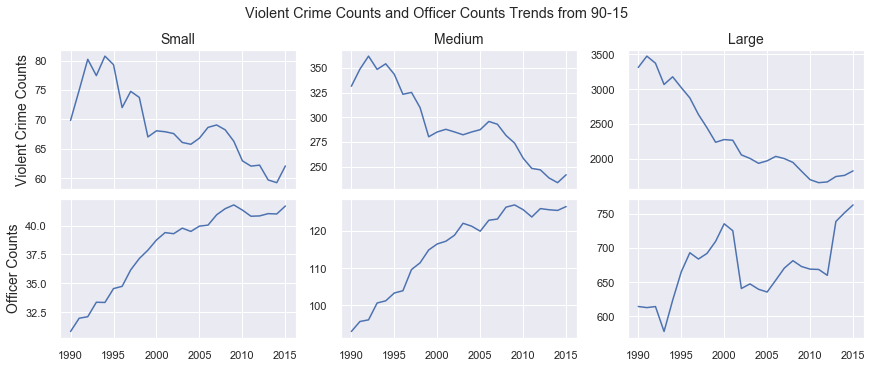

In [66]:
mult_plots_mult_rows(req_dfs = [fnl_mn_sml, fnl_mn_med, fnl_mn_large],
                        groupby_var='YEAR',
                        x_var = Years,
                        y_var_list = ['violent_crime', 'total_officers'],
                        x_label = 'Years',
                        y_label_lst = ['Violent Crime Counts', 'Officer Counts'],
                    plt_titles = ['Small', 'Medium', 'Large'],
                    fig_title = 'Violent Crime Counts and Officer Counts Trends from 90-15')

In [67]:
### Officer counts dropped dramatically from 2000 to 2002. Check what the numbers were for those years
fnl_mn_large.groupby('YEAR')['total_officers'].mean()

YEAR
1990    614.548295
1991    612.945245
1992    614.467967
1993    578.160237
1994    623.607046
1995    664.944444
1996    692.874269
1997    683.750700
1998    691.913889
1999    709.484848
2000    735.089855
2001    725.017045
2002    640.790368
2003    647.505747
2004    639.642651
2005    635.655172
2006    652.921965
2007    670.533724
2008    681.329513
2009    672.820000
2010    668.994302
2011    668.550459
2012    659.972067
2013    738.512676
2014    751.081921
2015    762.582857
Name: total_officers, dtype: float64

####   PPT1: Weighted - Violent Crime Counts vs Officer Counts

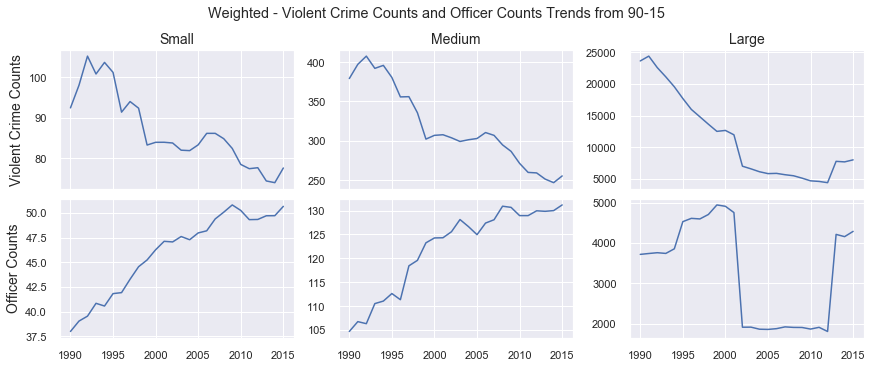

In [68]:
mult_plots_mult_rows(req_dfs = [fnl_mn_sml, fnl_mn_med, fnl_mn_large],
                        groupby_var='YEAR',
                        x_var = Years,
                        y_var_list = ['violent_crime', 'total_officers'],
                        x_label = 'Years',
                        y_label_lst = ['Violent Crime Counts', 'Officer Counts'],
                    plt_titles = ['Small', 'Medium', 'Large'],
                    fig_title = 'Weighted - Violent Crime Counts and Officer Counts Trends from 90-15',
                    weighted=True,
                        weights_var='population')

####  PPT1 - Violent Crime Rates vs Officer Rates

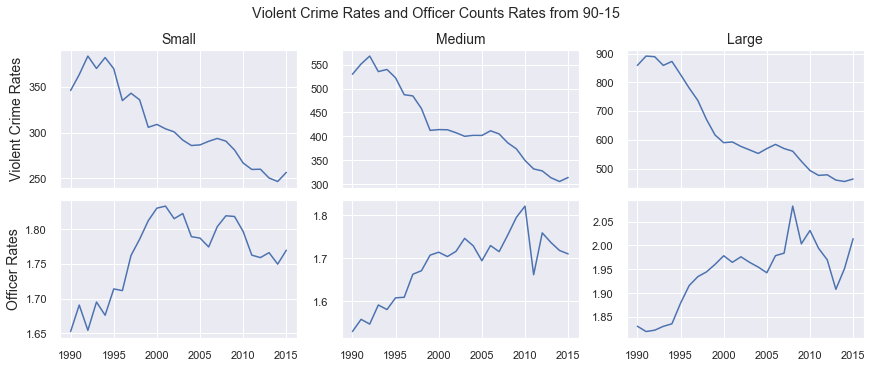

In [69]:
mult_plots_mult_rows(req_dfs = [fnl_mn_sml_rates, fnl_mn_med_rates, fnl_mn_large_rates],
                        groupby_var='YEAR',
                        x_var = Years,
                        y_var_list = ['violent_crime_rate', 'total_officers_rate'],
                        x_label = 'Years',
                        y_label_lst = ['Violent Crime Rates', 'Officer Rates'],
                    plt_titles = ['Small', 'Medium', 'Large'],
                    fig_title = 'Violent Crime Rates and Officer Counts Rates from 90-15')

#### Violent Crime Counts vs Prison Occupancy Counts

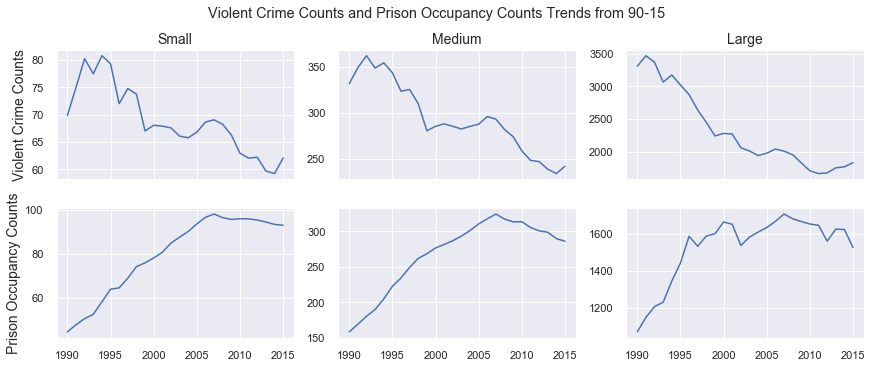

In [70]:
mult_plots_mult_rows(req_dfs = [fnl_mn_sml, fnl_mn_med, fnl_mn_large],
                        groupby_var='YEAR',
                        x_var = Years,
                        y_var_list = ['violent_crime', 'prison_occupancy_count'],
                        x_label = 'Years',
                        y_label_lst = ['Violent Crime Counts', 'Prison Occupancy Counts'],
                    plt_titles = ['Small', 'Medium', 'Large'],
                    fig_title = 'Violent Crime Counts and Prison Occupancy Counts Trends from 90-15')

#### PPT1 Weighted - Violent Crime Counts vs Prison Occupancy Counts

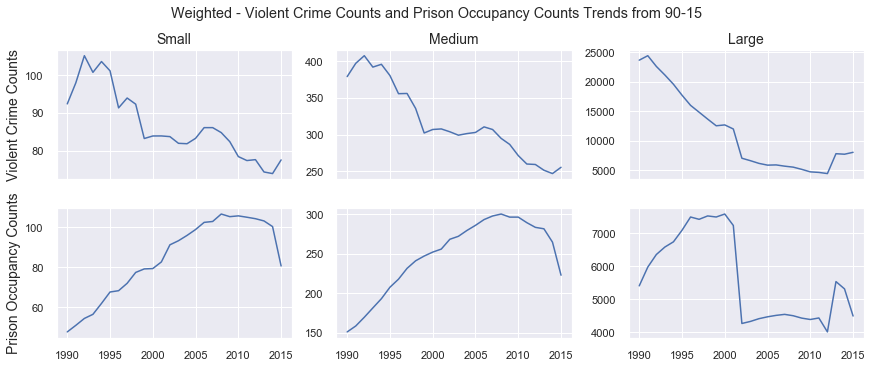

In [71]:
mult_plots_mult_rows(req_dfs = [fnl_mn_sml, fnl_mn_med, fnl_mn_large],
                        groupby_var='YEAR',
                        x_var = Years,
                        y_var_list = ['violent_crime', 'prison_occupancy_count'],
                        x_label = 'Years',
                        y_label_lst = ['Violent Crime Counts', 'Prison Occupancy Counts'],
                    plt_titles = ['Small', 'Medium', 'Large'],
                    fig_title = 'Weighted - Violent Crime Counts and Prison Occupancy Counts Trends from 90-15',
                    weighted=True,
                        weights_var='population')

#### PPT1 Violent Crime Rates vs Prison Occupancy Rates

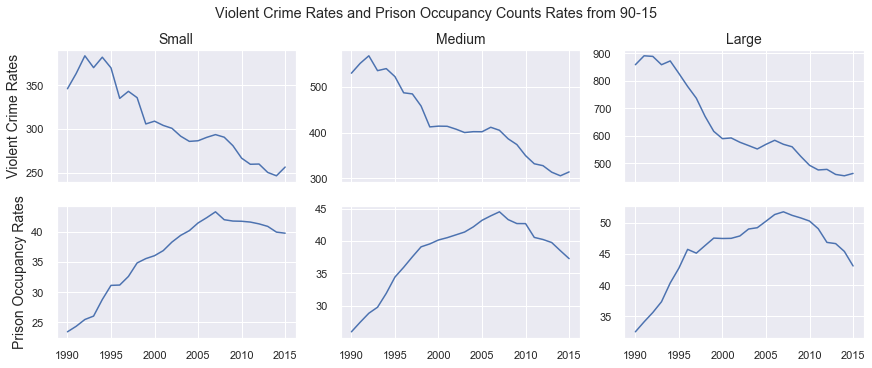

In [72]:
mult_plots_mult_rows(req_dfs = [fnl_mn_sml_rates, fnl_mn_med_rates, fnl_mn_large_rates],
                        groupby_var='YEAR',
                        x_var = Years,
                        y_var_list = ['violent_crime_rate', 'prison_occupancy_count_rate'],
                        x_label = 'Years',
                        y_label_lst = ['Violent Crime Rates', 'Prison Occupancy Rates'],
                    plt_titles = ['Small', 'Medium', 'Large'],
                    fig_title = 'Violent Crime Rates and Prison Occupancy Counts Rates from 90-15')

#### Violent Crime Counts vs Jail Occupancy Counts

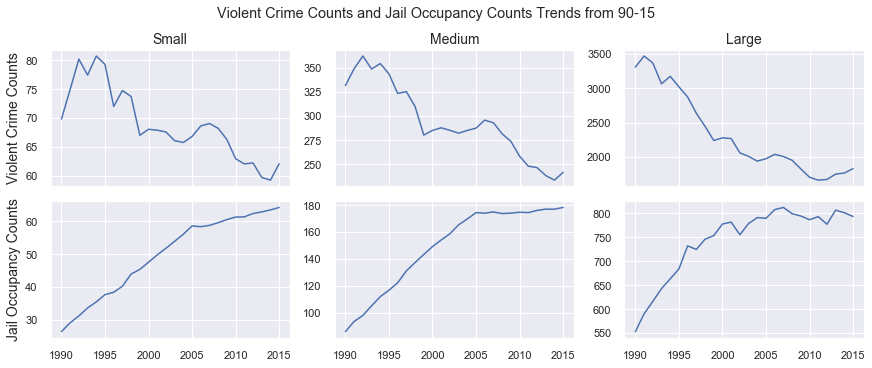

In [73]:
mult_plots_mult_rows(req_dfs = [fnl_mn_sml, fnl_mn_med, fnl_mn_large],
                        groupby_var='YEAR',
                        x_var = Years,
                        y_var_list = ['violent_crime', 'jail_occupancy_count'],
                        x_label = 'Years',
                        y_label_lst = ['Violent Crime Counts', 'Jail Occupancy Counts'],
                    plt_titles = ['Small', 'Medium', 'Large'],
                    fig_title = 'Violent Crime Counts and Jail Occupancy Counts Trends from 90-15')

#### PPT1 - Weighted - Violent Crime Counts vs Jail Occupancy Counts

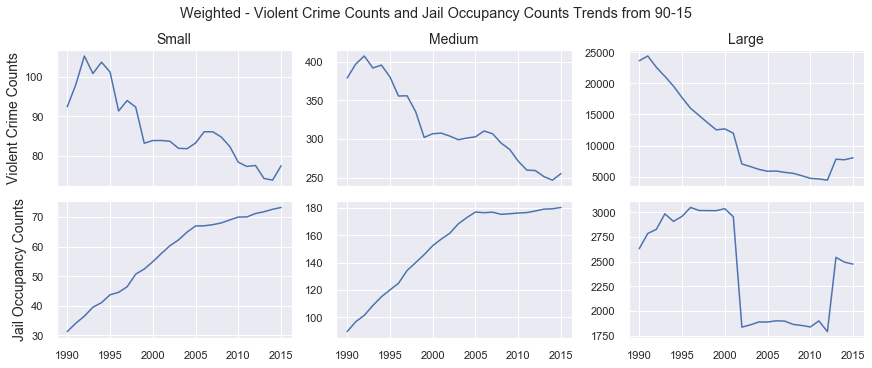

In [74]:
mult_plots_mult_rows(req_dfs = [fnl_mn_sml, fnl_mn_med, fnl_mn_large],
                        groupby_var='YEAR',
                        x_var = Years,
                        y_var_list = ['violent_crime', 'jail_occupancy_count'],
                        x_label = 'Years',
                        y_label_lst = ['Violent Crime Counts', 'Jail Occupancy Counts'],
                    plt_titles = ['Small', 'Medium', 'Large'],
                    fig_title = 'Weighted - Violent Crime Counts and Jail Occupancy Counts Trends from 90-15',
                    weighted=True,
                        weights_var='population')

#### PPT1 -  Violent Crime Rates vs Jail Occupancy Rates

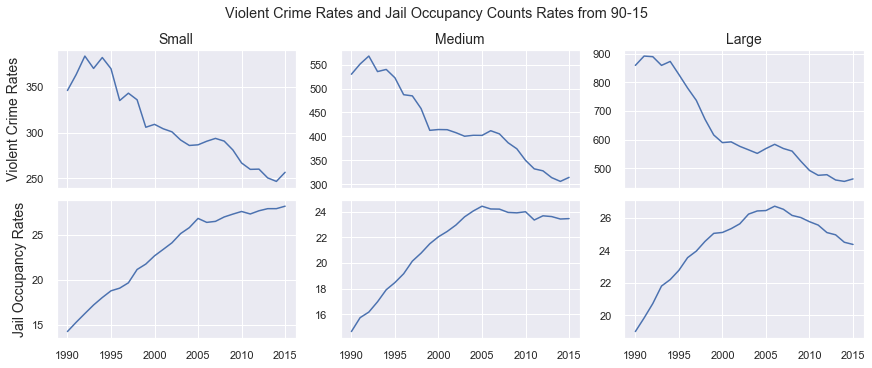

In [75]:
mult_plots_mult_rows(req_dfs = [fnl_mn_sml_rates, fnl_mn_med_rates, fnl_mn_large_rates],
                        groupby_var='YEAR',
                        x_var = Years,
                        y_var_list = ['violent_crime_rate', 'jail_occupancy_count_rate'],
                        x_label = 'Years',
                        y_label_lst = ['Violent Crime Rates', 'Jail Occupancy Rates'],
                    plt_titles = ['Small', 'Medium', 'Large'],
                    fig_title = 'Violent Crime Rates and Jail Occupancy Counts Rates from 90-15')

#### Violent Crime Counts vs Drug Total Arrests

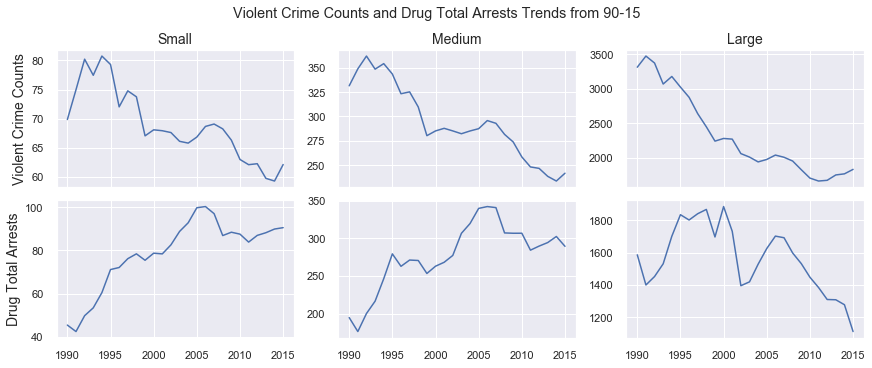

In [76]:
mult_plots_mult_rows(req_dfs = [fnl_mn_sml, fnl_mn_med, fnl_mn_large],
                        groupby_var='YEAR',
                        x_var = Years,
                        y_var_list = ['violent_crime', 'drug_tot_arrests'],
                        x_label = 'Years',
                        y_label_lst = ['Violent Crime Counts', 'Drug Total Arrests'],
                    plt_titles = ['Small', 'Medium', 'Large'],
                    fig_title = 'Violent Crime Counts and Drug Total Arrests Trends from 90-15')

#### PPT1:  Weighted - Violent Crime Counts vs Drug Total Arrests

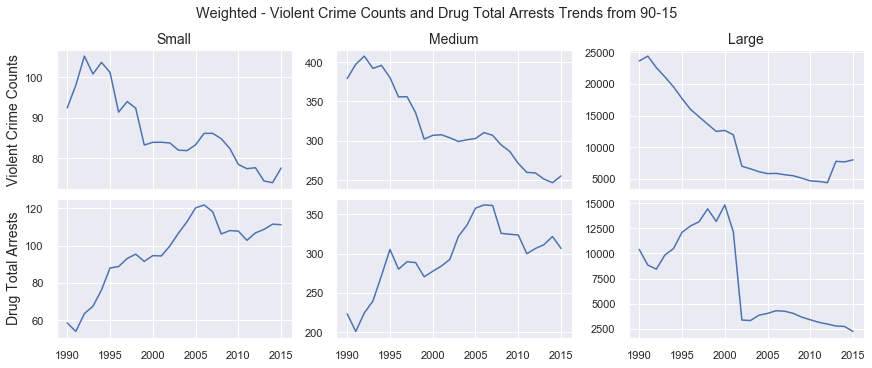

In [77]:
mult_plots_mult_rows(req_dfs = [fnl_mn_sml, fnl_mn_med, fnl_mn_large],
                        groupby_var='YEAR',
                        x_var = Years,
                        y_var_list = ['violent_crime', 'drug_tot_arrests'],
                        x_label = 'Years',
                        y_label_lst = ['Violent Crime Counts', 'Drug Total Arrests'],
                    plt_titles = ['Small', 'Medium', 'Large'],
                    fig_title = 'Weighted - Violent Crime Counts and Drug Total Arrests Trends from 90-15',
                    weighted=True,
                        weights_var='population')

#### PPT1- Violent Crime Rates vs Drug Total Arrests Rates

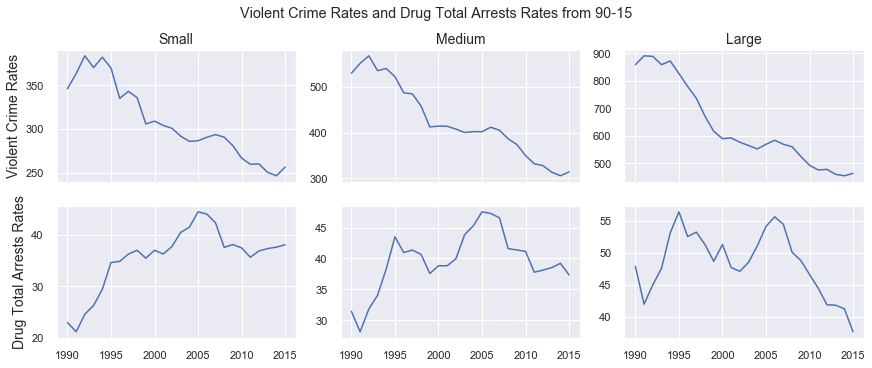

In [78]:
mult_plots_mult_rows(req_dfs = [fnl_mn_sml_rates, fnl_mn_med_rates, fnl_mn_large_rates],
                        groupby_var='YEAR',
                        x_var = Years,
                        y_var_list = ['violent_crime_rate', 'drug_tot_arrests_rate'],
                        x_label = 'Years',
                        y_label_lst = ['Violent Crime Rates', 'Drug Total Arrests Rates'],
                    plt_titles = ['Small', 'Medium', 'Large'],
                    fig_title = 'Violent Crime Rates and Drug Total Arrests Rates from 90-15')

#### Violent Crime Counts vs Drug Total Arrests Black

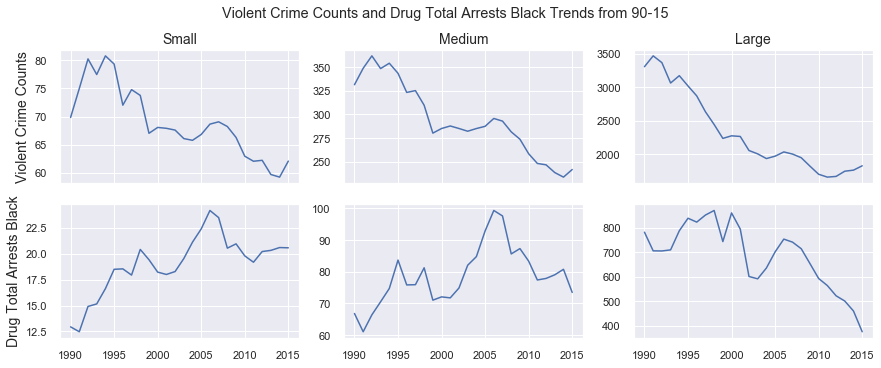

In [79]:
mult_plots_mult_rows(req_dfs = [fnl_mn_sml, fnl_mn_med, fnl_mn_large],
                        groupby_var='YEAR',
                        x_var = Years,
                        y_var_list = ['violent_crime', 'drug_tot_arrests_black'],
                        x_label = 'Years',
                        y_label_lst = ['Violent Crime Counts', 'Drug Total Arrests Black'],
                    plt_titles = ['Small', 'Medium', 'Large'],
                    fig_title = 'Violent Crime Counts and Drug Total Arrests Black Trends from 90-15')

#### PPT1 - Weighted - Violent Crime Counts vs Drug Total Arrests Black

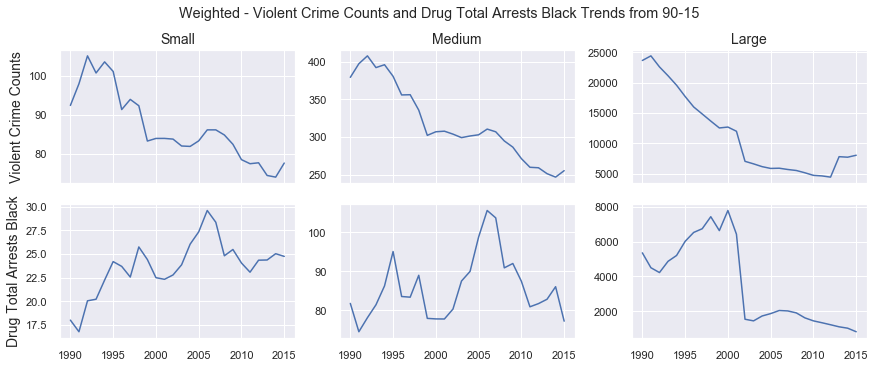

In [80]:
mult_plots_mult_rows(req_dfs = [fnl_mn_sml, fnl_mn_med, fnl_mn_large],
                        groupby_var='YEAR',
                        x_var = Years,
                        y_var_list = ['violent_crime', 'drug_tot_arrests_black'],
                        x_label = 'Years',
                        y_label_lst = ['Violent Crime Counts', 'Drug Total Arrests Black'],
                    plt_titles = ['Small', 'Medium', 'Large'],
                    fig_title = 'Weighted - Violent Crime Counts and Drug Total Arrests Black Trends from 90-15',
                    weighted=True,
                        weights_var='population')

#### PPT1 - Violent Crime Rates vs Drug Total Arrests Black Rates

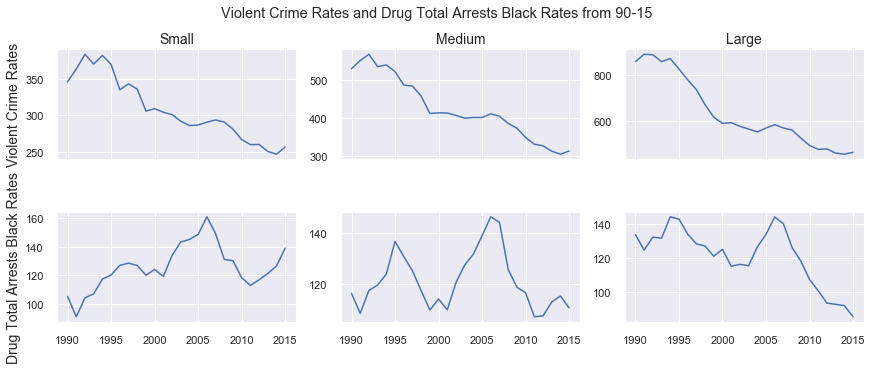

In [81]:
mult_plots_mult_rows(req_dfs = [fnl_mn_sml_rates, fnl_mn_med_rates, fnl_mn_large_rates],
                        groupby_var='YEAR',
                        x_var = Years,
                        y_var_list = ['violent_crime_rate', 'drug_tot_arrests_black_rate'],
                        x_label = 'Years',
                        y_label_lst = ['Violent Crime Rates', 'Drug Total Arrests Black Rates'],
                    plt_titles = ['Small', 'Medium', 'Large'],
                    fig_title = 'Violent Crime Rates and Drug Total Arrests Black Rates from 90-15')

#### Violent Crime Counts vs Drug Total Arrests White

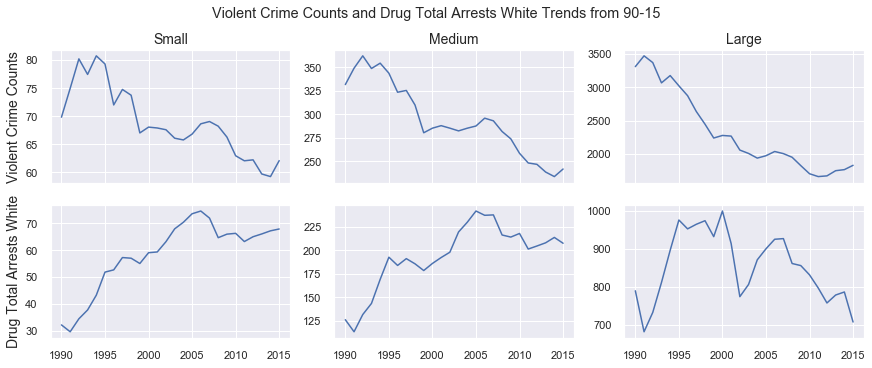

In [82]:
mult_plots_mult_rows(req_dfs = [fnl_mn_sml, fnl_mn_med, fnl_mn_large],
                        groupby_var='YEAR',
                        x_var = Years,
                        y_var_list = ['violent_crime', 'drug_tot_arrests_white'],
                        x_label = 'Years',
                        y_label_lst = ['Violent Crime Counts', 'Drug Total Arrests White'],
                    plt_titles = ['Small', 'Medium', 'Large'],
                    fig_title = 'Violent Crime Counts and Drug Total Arrests White Trends from 90-15')

#### PPT1 - Weighted - Violent Crime Counts vs Drug Total Arrests White

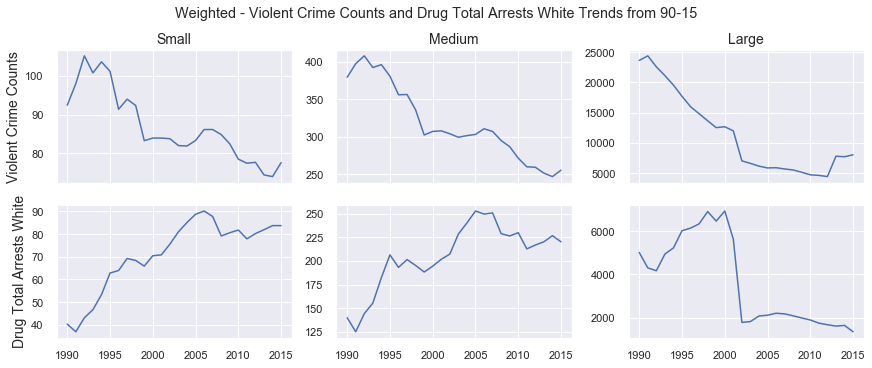

In [83]:
mult_plots_mult_rows(req_dfs = [fnl_mn_sml, fnl_mn_med, fnl_mn_large],
                        groupby_var='YEAR',
                        x_var = Years,
                        y_var_list = ['violent_crime', 'drug_tot_arrests_white'],
                        x_label = 'Years',
                        y_label_lst = ['Violent Crime Counts', 'Drug Total Arrests White'],
                    plt_titles = ['Small', 'Medium', 'Large'],
                    fig_title = 'Weighted - Violent Crime Counts and Drug Total Arrests White Trends from 90-15',
                    weighted=True,
                        weights_var='population')

#### PPT1 - Violent Crime Rates vs Drug Total Arrests White Rates

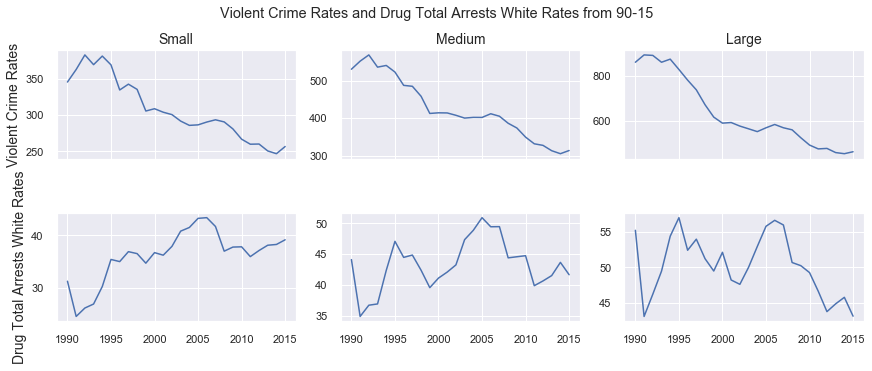

In [84]:
mult_plots_mult_rows(req_dfs = [fnl_mn_sml_rates, fnl_mn_med_rates, fnl_mn_large_rates],
                        groupby_var='YEAR',
                        x_var = Years,
                        y_var_list = ['violent_crime_rate', 'drug_tot_arrests_white_rate'],
                        x_label = 'Years',
                        y_label_lst = ['Violent Crime Rates', 'Drug Total Arrests White Rates'],
                    plt_titles = ['Small', 'Medium', 'Large'],
                    fig_title = 'Violent Crime Rates and Drug Total Arrests White Rates from 90-15')

#### Violent Crime Counts vs Disorder Arrests Total Index 

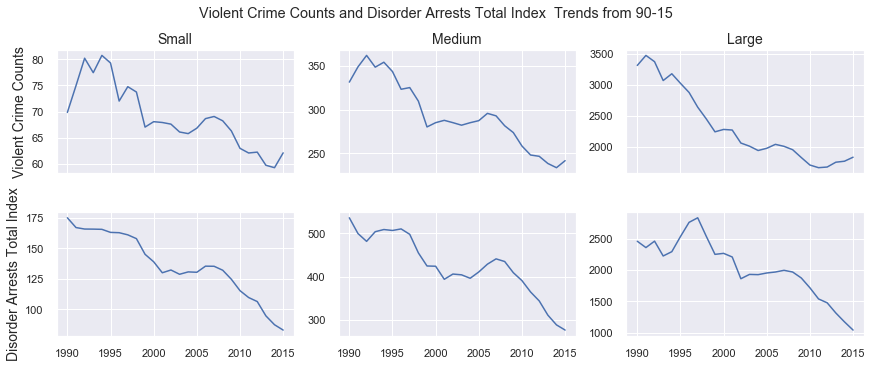

In [85]:
mult_plots_mult_rows(req_dfs = [fnl_mn_sml, fnl_mn_med, fnl_mn_large],
                        groupby_var='YEAR',
                        x_var = Years,
                        y_var_list = ['violent_crime', 'disorder_arrests_tot_index'],
                        x_label = 'Years',
                        y_label_lst = ['Violent Crime Counts', 'Disorder Arrests Total Index'],
                    plt_titles = ['Small', 'Medium', 'Large'],
                    fig_title = 'Violent Crime Counts and Disorder Arrests Total Index  Trends from 90-15')

#### PPT1 - Weighted - Violent Crime Counts vs Disorder Arrests Total Index

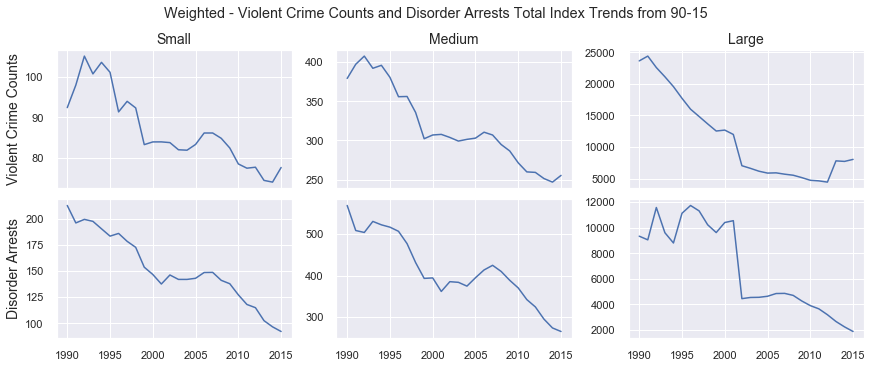

In [86]:
mult_plots_mult_rows(req_dfs = [fnl_mn_sml, fnl_mn_med, fnl_mn_large],
                        groupby_var='YEAR',
                        x_var = Years,
                        y_var_list = ['violent_crime', 'disorder_arrests_tot_index'],
                        x_label = 'Years',
                        y_label_lst = ['Violent Crime Counts', 'Disorder Arrests'],
                    plt_titles = ['Small', 'Medium', 'Large'],
                    fig_title = 'Weighted - Violent Crime Counts and Disorder Arrests Total Index Trends from 90-15',
                    weighted=True,
                        weights_var='population')

#### PPT1 - Violent Crime Rates vs Disorder Arrests Total Index Rates

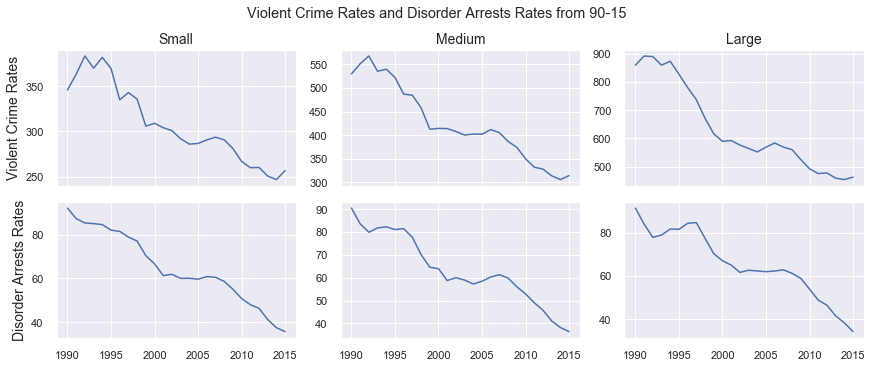

In [87]:
mult_plots_mult_rows(req_dfs = [fnl_mn_sml_rates, fnl_mn_med_rates, fnl_mn_large_rates],
                        groupby_var='YEAR',
                        x_var = Years,
                        y_var_list = ['violent_crime_rate', 'disorder_arrests_tot_index_rate'],
                        x_label = 'Years',
                        y_label_lst = ['Violent Crime Rates', 'Disorder Arrests Rates'],
                    plt_titles = ['Small', 'Medium', 'Large'],
                    fig_title = 'Violent Crime Rates and Disorder Arrests Rates from 90-15')

#### Violent Crime Counts vs Disorder Arrests Total Black Index 


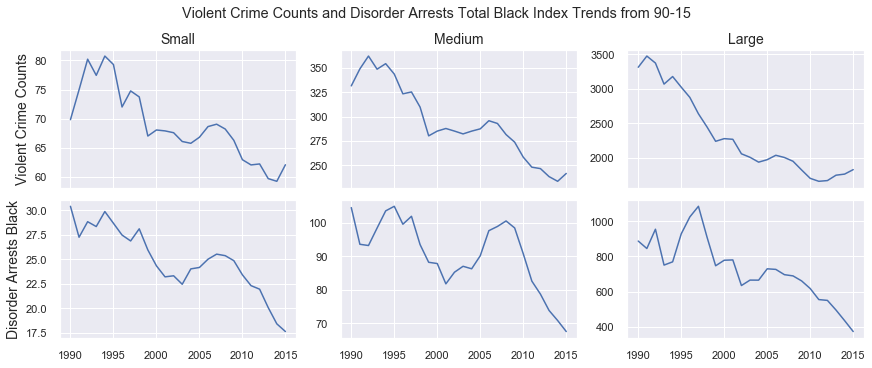

In [88]:
mult_plots_mult_rows(req_dfs = [fnl_mn_sml, fnl_mn_med, fnl_mn_large],
                        groupby_var='YEAR',
                        x_var = Years,
                        y_var_list = ['violent_crime', 'disorder_tot_arrests_black_index'],
                        x_label = 'Years',
                        y_label_lst = ['Violent Crime Counts', 'Disorder Arrests Black'],
                    plt_titles = ['Small', 'Medium', 'Large'],
                    fig_title = 'Violent Crime Counts and Disorder Arrests Total Black Index Trends from 90-15')

#### PPT1 - Weighted - Violent Crime Counts vs Disorder Arrests Total Black Index 

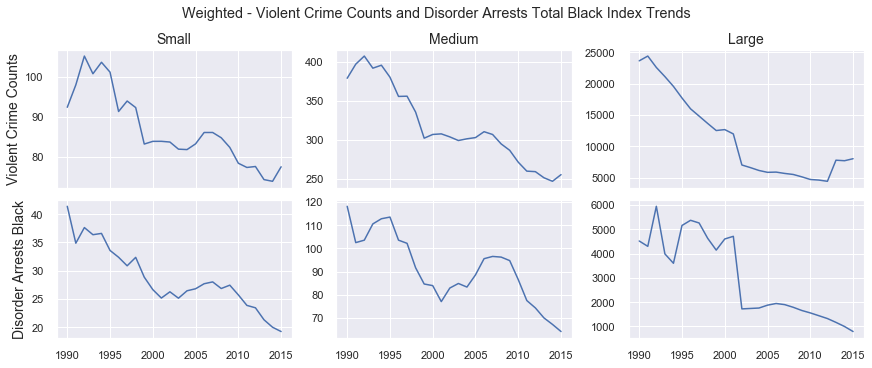

In [89]:
mult_plots_mult_rows(req_dfs = [fnl_mn_sml, fnl_mn_med, fnl_mn_large],
                        groupby_var='YEAR',
                        x_var = Years,
                        y_var_list = ['violent_crime', 'disorder_tot_arrests_black_index'],
                        x_label = 'Years',
                        y_label_lst = ['Violent Crime Counts', 'Disorder Arrests Black'],
                    plt_titles = ['Small', 'Medium', 'Large'],
                    fig_title = 'Weighted - Violent Crime Counts and Disorder Arrests Total Black Index Trends',
                    weighted=True,
                        weights_var='population')

#### PPT1 - Violent Crime Rates vs Disorder Arrests Total Black Index Rates

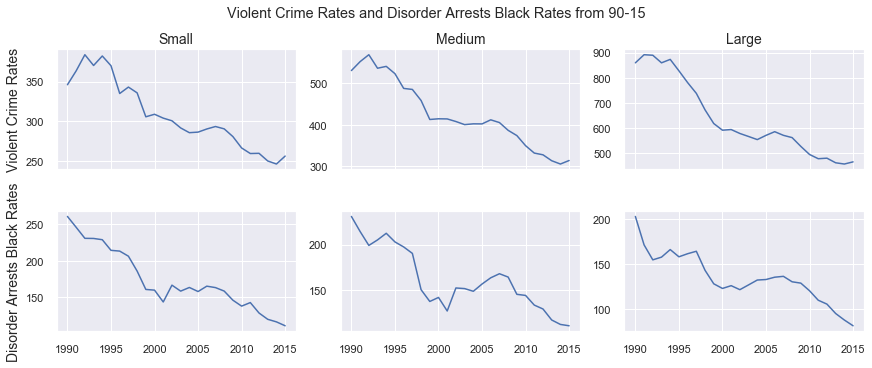

In [90]:
mult_plots_mult_rows(req_dfs = [fnl_mn_sml_rates, fnl_mn_med_rates, fnl_mn_large_rates],
                        groupby_var='YEAR',
                        x_var = Years,
                        y_var_list = ['violent_crime_rate', 'disorder_tot_arrests_black_index_rate'],
                        x_label = 'Years',
                        y_label_lst = ['Violent Crime Rates', 'Disorder Arrests Black Rates'],
                    plt_titles = ['Small', 'Medium', 'Large'],
                    fig_title = 'Violent Crime Rates and Disorder Arrests Black Rates from 90-15')

#### Violent Crime Counts vs Disorder Arrests Total White Index 

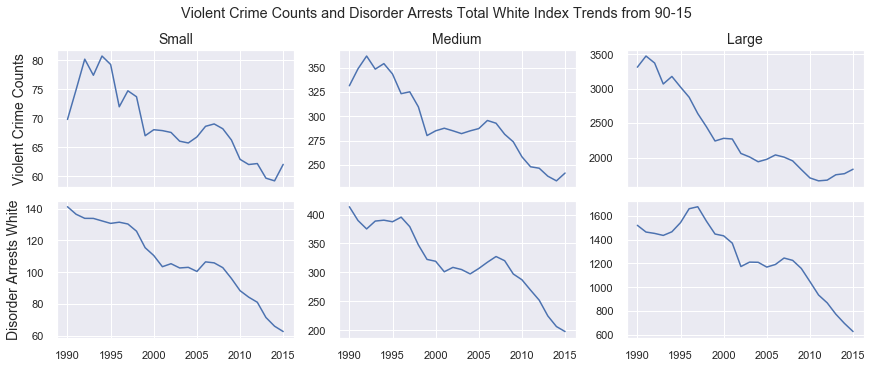

In [91]:
mult_plots_mult_rows(req_dfs = [fnl_mn_sml, fnl_mn_med, fnl_mn_large],
                        groupby_var='YEAR',
                        x_var = Years,
                        y_var_list = ['violent_crime', 'disorder_tot_arrests_white_index'],
                        x_label = 'Years',
                        y_label_lst = ['Violent Crime Counts', 'Disorder Arrests White'],
                    plt_titles = ['Small', 'Medium', 'Large'],
                    fig_title = 'Violent Crime Counts and Disorder Arrests Total White Index Trends from 90-15')

#### PPT1 - Weighted - Violent Crime Counts vs Disorder Arrests Total White Index 

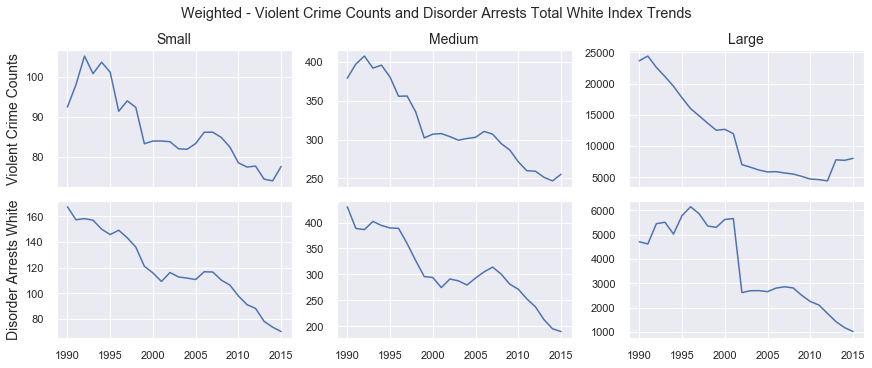

In [92]:
mult_plots_mult_rows(req_dfs = [fnl_mn_sml, fnl_mn_med, fnl_mn_large],
                        groupby_var='YEAR',
                        x_var = Years,
                        y_var_list = ['violent_crime', 'disorder_tot_arrests_white_index'],
                        x_label = 'Years',
                        y_label_lst = ['Violent Crime Counts', 'Disorder Arrests White'],
                    plt_titles = ['Small', 'Medium', 'Large'],
                    fig_title = 'Weighted - Violent Crime Counts and Disorder Arrests Total White Index Trends',
                    weighted=True,
                        weights_var='population')

#### PPT1 - Violent Crime Rates vs Disorder Arrests Total White Index Rates

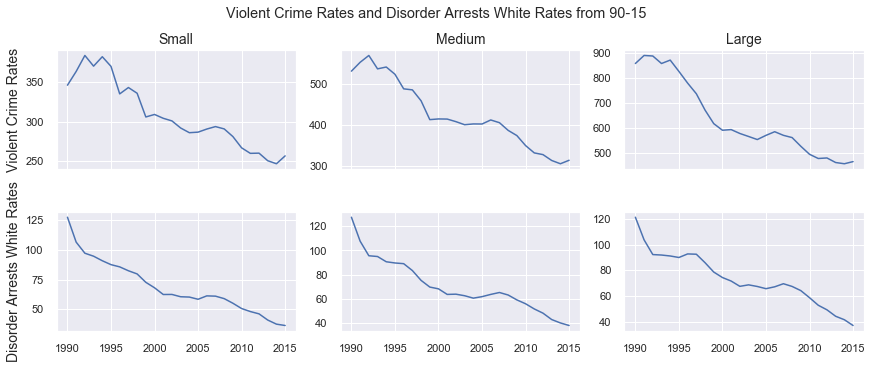

In [93]:
mult_plots_mult_rows(req_dfs = [fnl_mn_sml_rates, fnl_mn_med_rates, fnl_mn_large_rates],
                        groupby_var='YEAR',
                        x_var = Years,
                        y_var_list = ['violent_crime_rate', 'disorder_tot_arrests_white_index_rate'],
                        x_label = 'Years',
                        y_label_lst = ['Violent Crime Rates', 'Disorder Arrests White Rates'],
                    plt_titles = ['Small', 'Medium', 'Large'],
                    fig_title = 'Violent Crime Rates and Disorder Arrests White Rates from 90-15')

## CORRELATION MATRIX HEATMAPS

In [32]:
def generate_corr_heatmap(df, vars):
    var_corr = df.loc[:, vars].corr()
    # plot the heatmap and annotation on it
    sns.heatmap(var_corr, xticklabels=var_corr.columns, yticklabels=var_corr.columns, annot=True, cmap='Greens')


#### PPT1 -  Large Agencies - Violent Crime vs Core Vars 

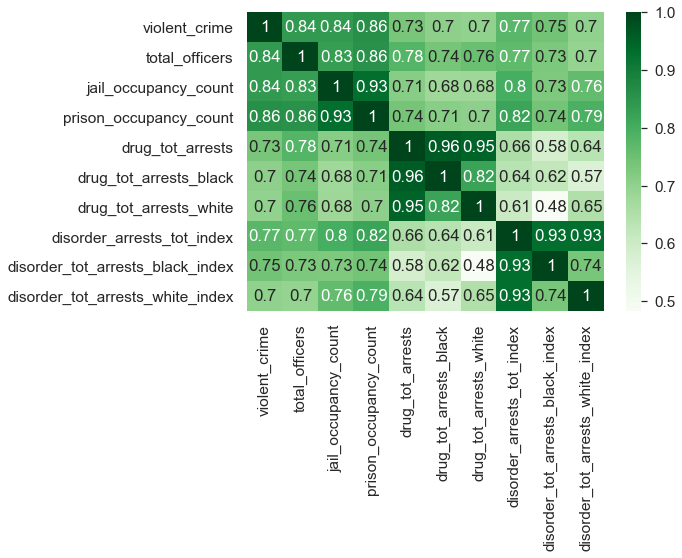

In [33]:
generate_corr_heatmap(df = fnl_mn_large,
                     vars = ['violent_crime', 'total_officers', 'jail_occupancy_count', 'prison_occupancy_count', 
                             'drug_tot_arrests', 'drug_tot_arrests_black', 'drug_tot_arrests_white',
                            'disorder_arrests_tot_index', 'disorder_tot_arrests_black_index',
                            'disorder_tot_arrests_white_index'])

#### PPT1 - Medium Agencies - Violent Crime vs Core Vars 

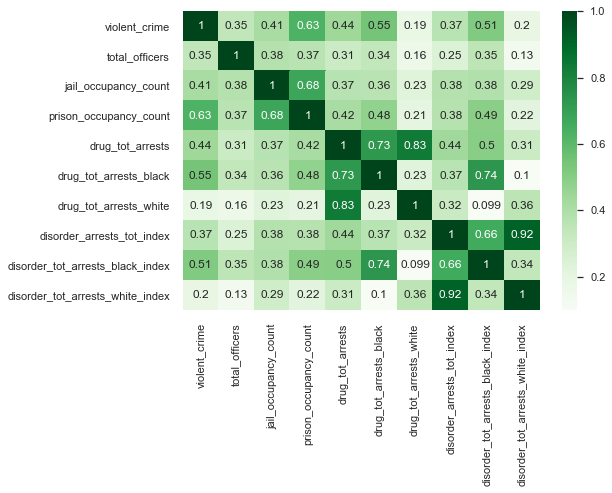

In [96]:
generate_corr_heatmap(df = fnl_mn_med,
                     vars = ['violent_crime', 'total_officers', 'jail_occupancy_count', 'prison_occupancy_count', 
                             'drug_tot_arrests', 'drug_tot_arrests_black', 'drug_tot_arrests_white',
                            'disorder_arrests_tot_index', 'disorder_tot_arrests_black_index',
                            'disorder_tot_arrests_white_index'])

#### PPT1 - Small Agencies - Violent Crime vs Core Vars 

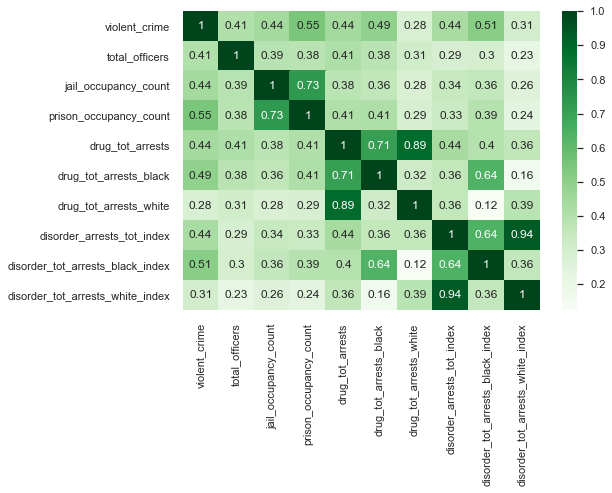

In [97]:
generate_corr_heatmap(df = fnl_mn_sml,
                     vars = ['violent_crime', 'total_officers', 'jail_occupancy_count', 'prison_occupancy_count', 
                             'drug_tot_arrests', 'drug_tot_arrests_black', 'drug_tot_arrests_white',
                            'disorder_arrests_tot_index', 'disorder_tot_arrests_black_index',
                            'disorder_tot_arrests_white_index'])

### PAIR PLOTS FOR VIOLENT CRIMES VS CORE VARS

In [45]:
def gen_pair_plots(df, vars):
    req_df = df.loc[:, vars]
    sns.pairplot(req_df, kind='reg', diag_kind="kde")
#     elif plts_kind == 'reg':
#         # Fit linear regression models to the scatter plots:
#         g = sns.pairplot(iris, kind="reg")

#### PPT1 - Large Agencies - Violent Crime vs Incarc, Drug Arrests Pair Plots

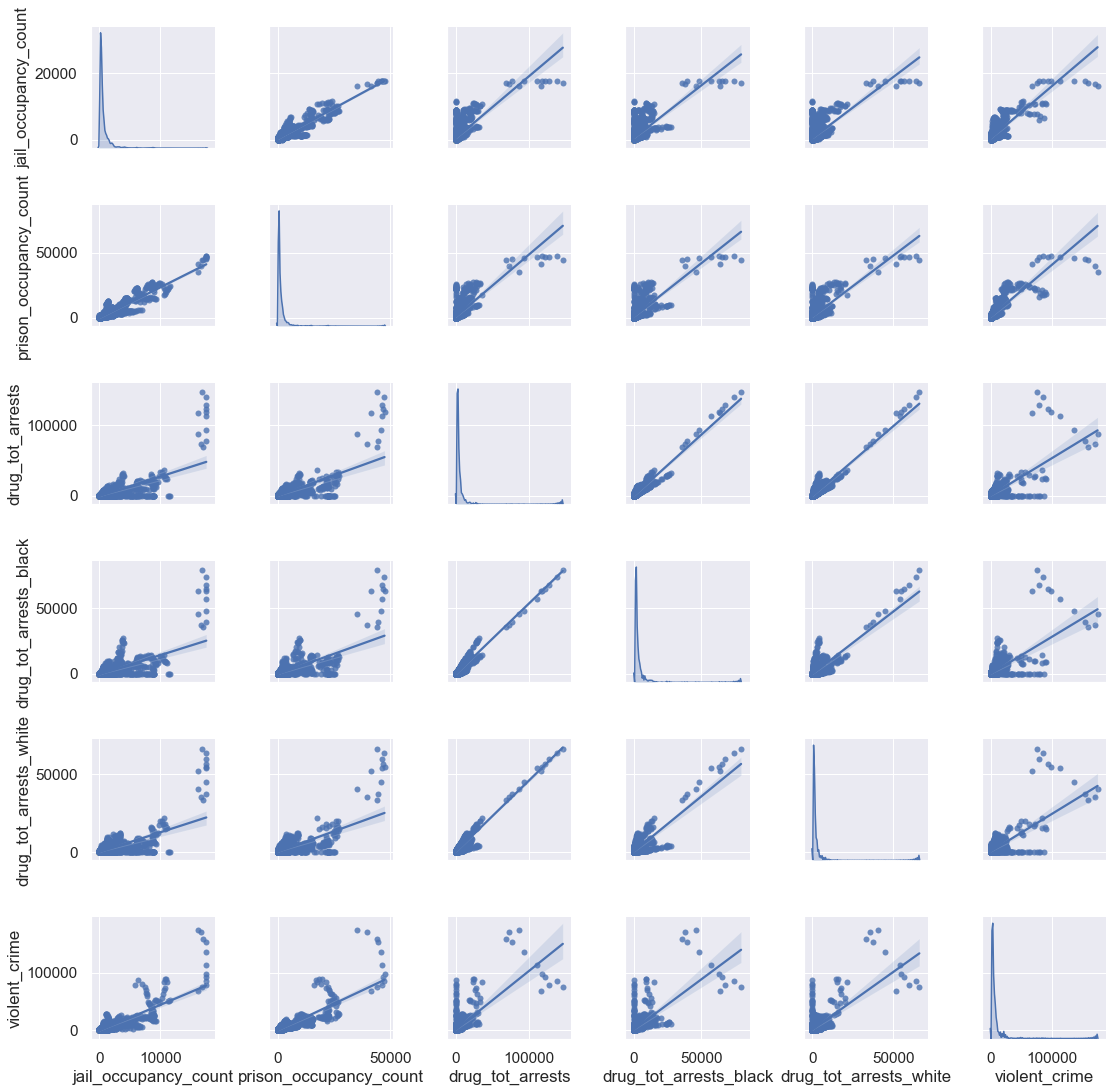

In [46]:
gen_pair_plots(df = fnl_mn_large, 
               vars = ['jail_occupancy_count', 'prison_occupancy_count',
                       'drug_tot_arrests', 'drug_tot_arrests_black', 
                       'drug_tot_arrests_white', 'violent_crime'])

#### PPT1 - Large Agencies - Violent Crime vs Officers, Disorder Pair Plots

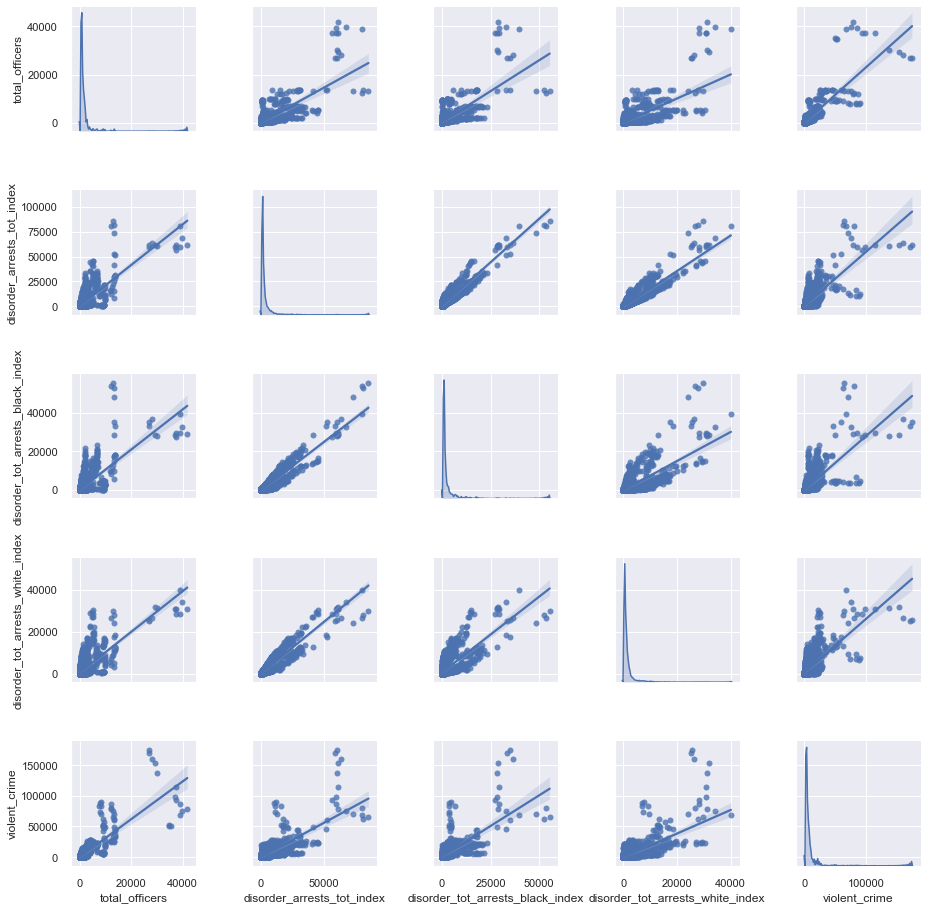

In [100]:
gen_pair_plots(df = fnl_mn_large, 
               vars = ['total_officers', 'disorder_arrests_tot_index', 
                       'disorder_tot_arrests_black_index', 'disorder_tot_arrests_white_index', 'violent_crime'])

#### PPT1 - Medium Agencies - Violent Crime vs Incarc, Drug Arrests Pair Plots

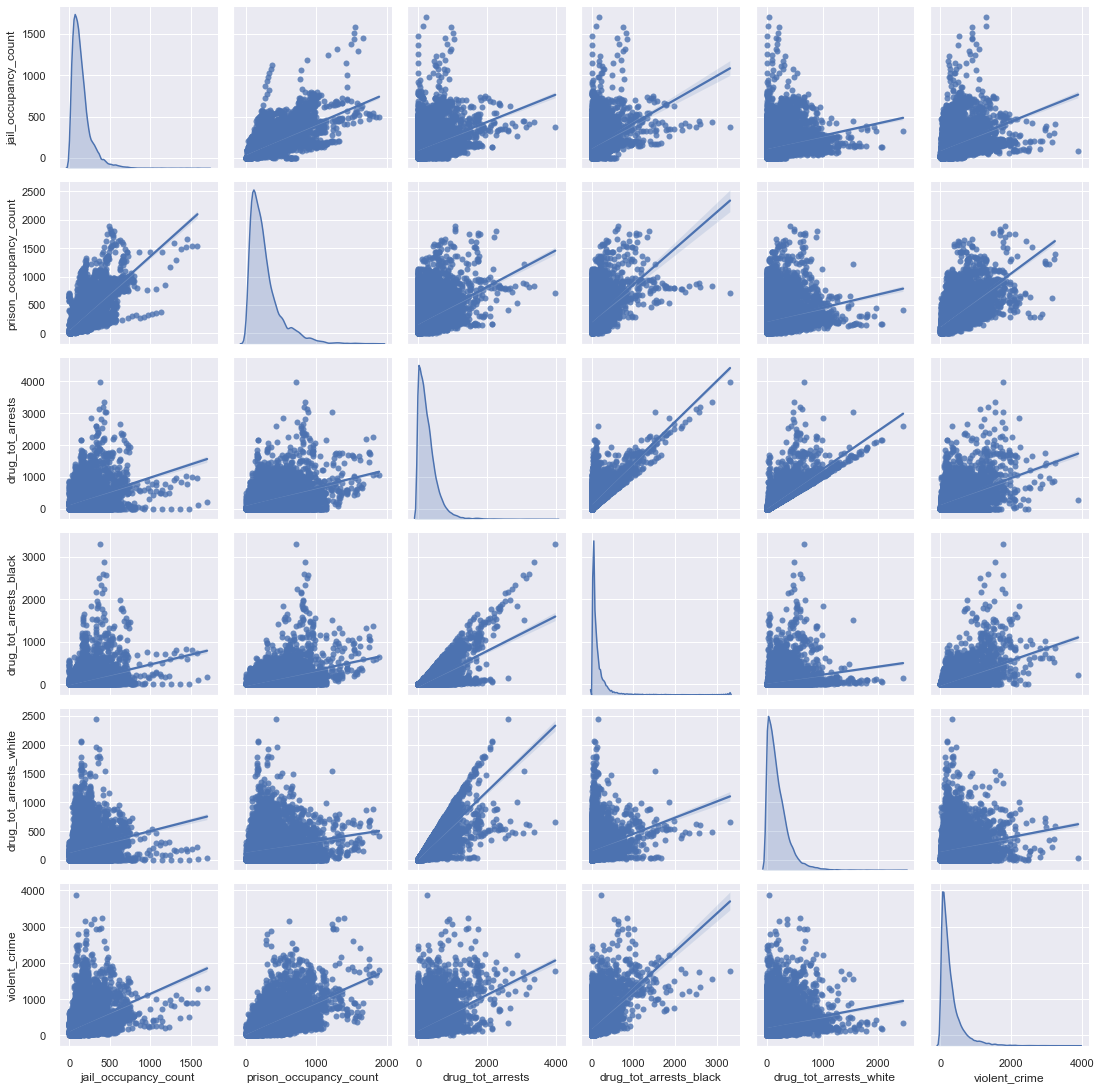

In [101]:
gen_pair_plots(df = fnl_mn_med, 
               vars = ['jail_occupancy_count', 'prison_occupancy_count',
                       'drug_tot_arrests', 'drug_tot_arrests_black', 
                       'drug_tot_arrests_white', 'violent_crime'])

#### PPT1 - Medium Agencies - Violent Crime vs Officers, Disorder Pair Plots

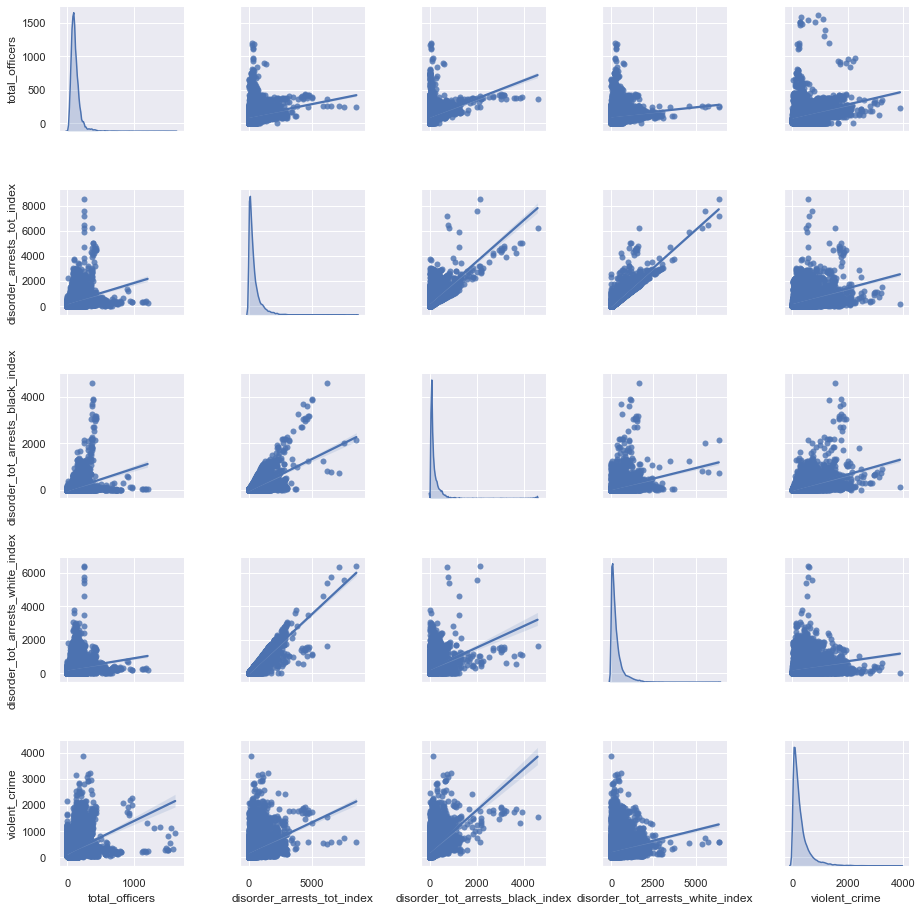

In [102]:
gen_pair_plots(df = fnl_mn_med, 
               vars = ['total_officers', 'disorder_arrests_tot_index', 
                       'disorder_tot_arrests_black_index', 'disorder_tot_arrests_white_index', 'violent_crime'])

#### PPT1 - Small Agencies - Violent Crime vs Incarc, Drug Arrests Pair Plots

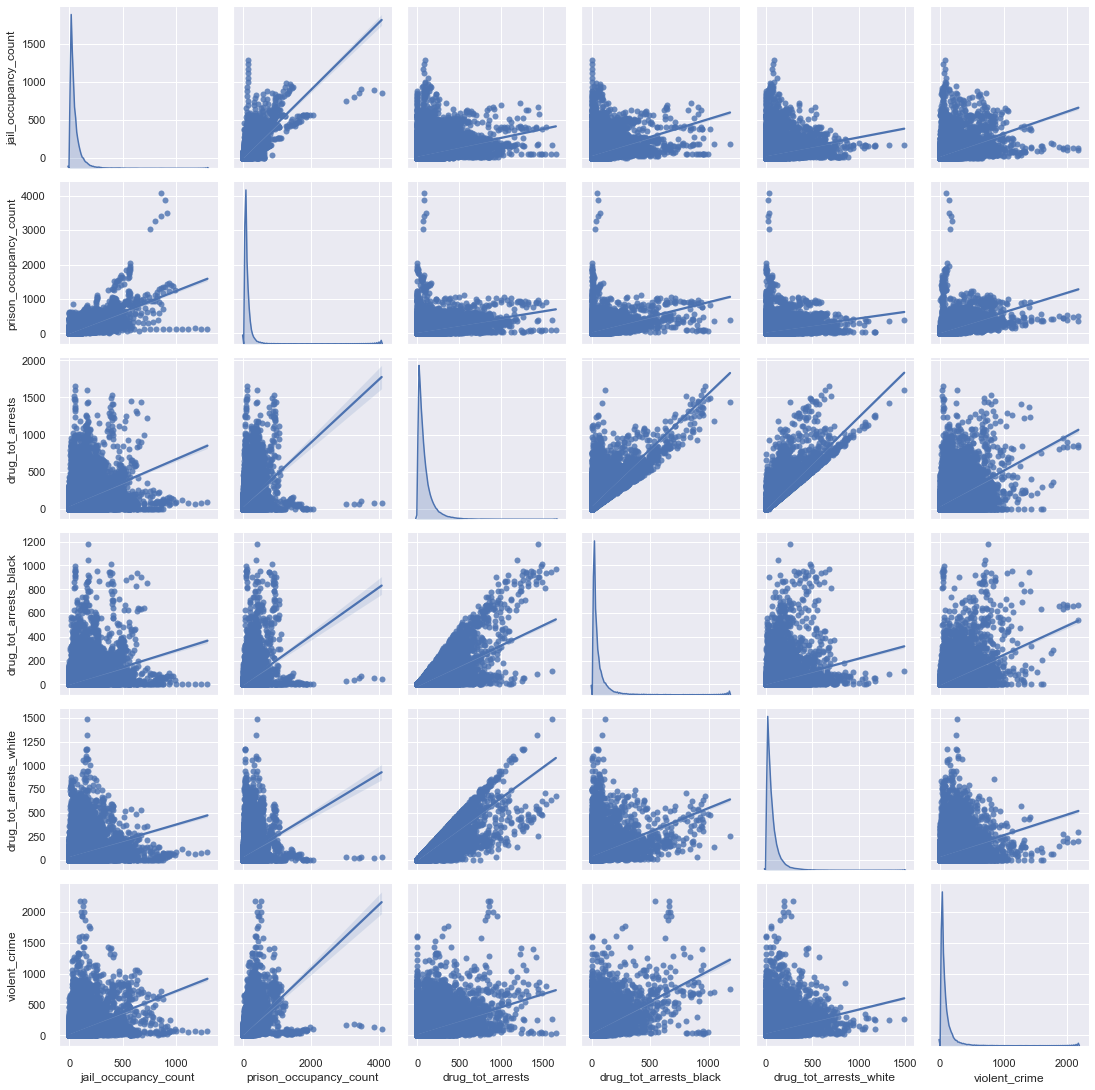

In [103]:
gen_pair_plots(df = fnl_mn_sml, 
               vars = ['jail_occupancy_count', 'prison_occupancy_count',
                       'drug_tot_arrests', 'drug_tot_arrests_black', 
                       'drug_tot_arrests_white', 'violent_crime'])

#### PPT1 - Small Agencies - Violent Crime vs Officers, Disorder Pair Plots

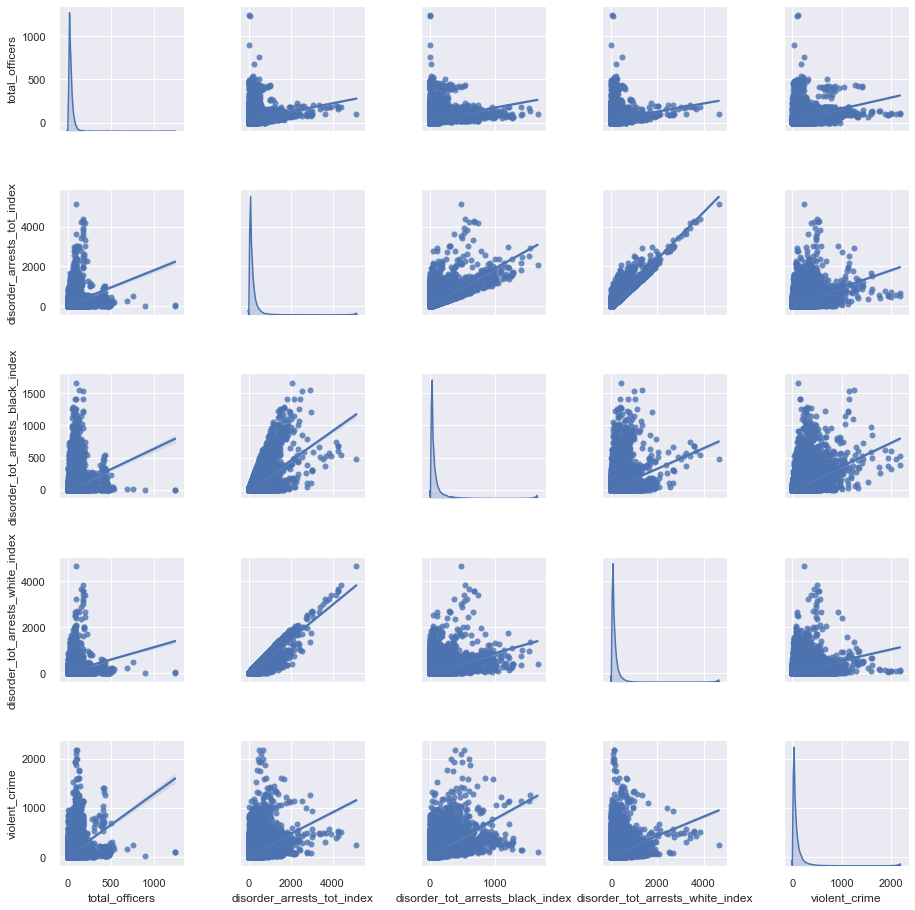

In [104]:
gen_pair_plots(df = fnl_mn_sml, 
               vars = ['total_officers', 'disorder_arrests_tot_index', 
                       'disorder_tot_arrests_black_index', 'disorder_tot_arrests_white_index', 'violent_crime'])